# **Reporte: Estadísticas de Divorcio (INEGI, 2023)**

Carlos Hernández Márquez

"Doy mi palabra que he realizado esta actividad con integridad académica"

# **Introducción** 

El presente reporte corresponde al **Proyecto P1 de la asignatura SC3314 – Inteligencia Artificial** de la Universidad de Monterrey, cuyo objetivo es aplicar metodologías de regresión para el análisis y modelado de datos reales.  

Para el desarrollo del proyecto se seleccionó la base de datos **“Estadística de Divorcios 2023”**, publicada por el **Instituto Nacional de Estadística y Geografía (INEGI)** a través de su portal de datos abiertos [https://www.inegi.org.mx/datosabiertos/](https://www.inegi.org.mx/datosabiertos/). Este conjunto de información constituye un insumo de carácter oficial y público, con cobertura nacional y actualización anual, lo cual asegura tanto su confiabilidad como su relevancia para fines académicos y de investigación aplicada.  

El objetivo específico de este estudio es **evaluar la relación entre diversas variables sociodemográficas y jurídicas de los procesos de divorcio en México** con el propósito de **predecir e inferir la *duración del matrimonio*** a partir de factores asociados como edad de los cónyuges, número de hijos, tipo de trámite, pensión alimenticia, régimen de custodia, nacionalidad y otras características relevantes.  

En particular, este proyecto busca:  

- Caracterizar la base de datos, identificando su estructura, calidad y limitaciones.  
- Implementar técnicas de preprocesamiento para atender problemas de datos faltantes, valores atípicos, colinealidad y variables categóricas.  
- Desarrollar modelos de regresión lineal y no lineal que permitan explicar y predecir la duración del matrimonio.  
- Analizar la pertinencia de las distintas metodologías de selección de características, evaluando su impacto en la generalización y desempeño de los modelos.  
- Interpretar los resultados bajo un enfoque inferencial, generando conclusiones respaldadas por métricas estadísticas y márgenes de error.  


# **I. Caracterización de la base de datos y fundamentación metodológicaI**

En esta primera etapa se llevó a cabo la **importación y exploración inicial del conjunto de datos “Estadística de Divorcios 2023”**, publicado por el INEGI en su portal de datos abiertos.

In [1289]:
import pandas as pd 

conjuntDatos = "conjunto_de_datos_ed2023.csv"
diccionarioDatos = "diccionario_datos_ed2023.csv"
df = pd.read_csv(conjuntDatos)
diccionario = pd.read_csv(diccionarioDatos)

In [1290]:
print("Número de Observaciones:",df.shape[0])
print("Número de Variables:",df.shape[1])

Número de Observaciones: 163587
Número de Variables: 64


El *dataset* consta de **163,587 observaciones** y **64 variables**, lo cual lo convierte en un insumo de gran tamaño y representatividad nacional. El número considerable de variables refleja la diversidad de dimensiones que caracterizan a los divorcios en México, incluyendo factores sociodemográficos (edad, nacionalidad, hijos), jurídicos (tipo de trámite, instancias de resolución), y administrativos (ubicación, registro). 

Este primer diagnóstico confirma que la regresión es un enfoque metodológico viable, dado que se cuenta con suficientes datos continuos y categóricos que permiten analizar asociaciones significativas entre las covariables y la duración del matrimonio.  

Para complementar la caracterización de la base de datos, se hizo uso del **diccionario de datos en formato CSV** provisto por INEGI, el cual contiene la descripción, tipo y catálogo asociado de cada variable. Este insumo es esencial en proyectos con bases de gran magnitud, pues permite garantizar la correcta interpretación semántica de los campos y ofrece una referencia directa a los catálogos oficiales, donde se especifican los rangos de valores y codificaciones posibles. De esta manera se asegura que los procedimientos de limpieza, codificación y análisis se realicen de forma consistente con la definición institucional de las variables.

En el desarrollo, se construyó un **diccionario simplificado** a partir de las columnas más relevantes: *nemonico* (clave de la variable), *nombre_campo* (descripción textual), *catalogo* (catálogo oficial de referencia) y *tipo* (numérica o categórica). Posteriormente, este diccionario fue ordenado alfabéticamente para facilitar la búsqueda y consulta durante el preprocesamiento y la construcción de modelos.

Esta decisión metodológica permite al analista ubicar rápidamente variables clave, identificar redundancias y tener trazabilidad entre el dataset y la documentación técnica oficial.

In [1291]:
diccionarioSimplificado = diccionario[["nemonico", "nombre_campo", "catalogo", "tipo"]].copy()
diccionarioSimplificado.columns = ["Variable", "Nombre", "Catalogo", "Tipo"]
diccionarioSimplificado = diccionarioSimplificado.sort_values(by="Variable").reset_index(drop=True)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

from IPython.display import display, Markdown
display(Markdown("### **Diccionario de variables: Estadísticas de Divorcios 2023**"))
diccionarioSimplificado

### **Diccionario de variables: Estadísticas de Divorcios 2023**

,Variable,Nombre,Catalogo,Tipo
0,anio_eje,Año de ejecutoria del divorcio.,año_ejecutoria,N
1,anio_mat,Año de registro del matrimonio.,año_registro,N
2,anio_reg,Año de registro de la demanda.,año_registro,N
3,anio_sen,Año de la sentencia.,año_sentencia,N
4,causa,Causas de divorcio.,causas_divorcio,N
5,con_acdiv1,Condición de actividad económica del primer divorciante.,condicion_actividad_economica,N
6,con_acdiv2,Condición de actividad económica del segundo divorciante.,condicion_actividad_economica,N
7,cus_hij,Número de hijos en custodia.,numero_de_hijos,N
8,custodia,Persona a quien se otorga la custodia.,custodia,N
9,dedic_div1,A qué se dedica el primer divorciante.,dedicado_a,N


El resultado sintetiza de manera ordenada las **64 variables** del conjunto, evidenciando la amplitud de dimensiones consideradas: temporales, sociodemográficas, familiares y administrativas. Se observa además que varias variables cualitativas se encuentran codificadas numéricamente, lo cual requerirá un tratamiento específico (por ejemplo, mediante *one-hot encoding*) para garantizar su adecuada incorporación en los modelos de regresión.  

In [1292]:
df.head(10)

,tipo_div,ent_regis,mun_regis,loc_regis,tloc_regis,ent_mat,mun_mat,local_mat,tloc_mat,dia_mat,mes_mat,anio_mat,dia_reg,mes_reg,anio_reg,dia_sen,mes_sen,anio_sen,dia_eje,mes_eje,anio_eje,ini_juic,favor,causa,hijos,hij_men,custodia,cus_hij,pat_pot,pat_hij,pension,pen_hij,naci_div1,edad_div1,nacim_div1,eciv_adiv1,ent_rhdiv1,mun_rhdiv1,loc_rhdiv1,tloc_div1,escol_div1,con_acdiv1,dedic_div1,postr_div1,sexo_div1,naci_div2,edad_div2,nacim_div2,eciv_adiv2,ent_rhdiv2,mun_rhdiv2,loc_rhdiv2,tloc_div2,escol_div2,con_acdiv2,dedic_div2,postr_div2,sexo_div2,dura_soc,dura_leg,edad_mdiv1,edad_mdiv2,t_dvante,dis_reoax
0,1,1,1,1,15,15,114,1,4,99,99,9999,17,10,2022,29,3,2023,29,3,2023,1,3,28,4,2,3,2,3,2,1,2,1,41,1981,9,1,1,9999,99,4,1,1,1,2,1,999,9999,9,1,1,9999,99,9,9,9,9,1,99,99,99,99,1,998
1,1,1,1,1,15,1,1,1,15,99,99,9999,29,1,2023,28,3,2023,29,3,2023,1,3,28,2,2,3,2,3,2,1,2,1,30,1992,1,1,1,1,15,5,2,3,9,2,1,29,1993,1,1,1,1,15,5,1,1,1,1,99,99,99,99,1,998
2,1,1,1,1,15,1,1,1,15,8,5,1967,19,7,2022,19,9,2023,19,9,2023,1,3,28,0,0,0,0,0,0,4,0,1,68,9999,1,1,1,1,15,4,1,1,8,1,1,999,9999,9,1,1,9999,99,9,9,9,9,2,55,56,99,99,1,998
3,1,1,1,1,15,1,1,1,15,17,5,1967,22,3,2023,16,5,2023,17,5,2023,1,3,28,7,0,0,0,0,0,4,0,1,999,9999,9,1,1,9999,99,9,9,9,9,2,1,77,1946,1,1,1,1,15,0,2,4,9,1,55,56,99,21,1,998
4,1,1,1,1,15,32,17,1,13,24,7,1968,23,5,2023,11,7,2023,11,7,2023,1,3,28,6,0,0,0,0,0,4,0,1,72,1951,1,1,1,1,15,4,1,1,1,1,1,999,9999,9,1,1,9999,99,9,9,9,9,2,54,54,17,99,1,998
5,1,1,7,1,9,1,9,1,5,15,1,1969,8,11,2022,15,2,2023,15,2,2023,1,3,28,5,0,0,0,0,0,2,0,1,70,1952,1,1,9,1,5,1,2,2,9,2,1,73,1949,1,1,9,1,5,1,1,1,3,1,53,54,17,20,1,998
6,1,1,1,1,15,9,999,9999,99,19,4,1969,14,8,2023,26,10,2023,26,10,2023,1,3,28,4,0,0,0,0,0,4,0,1,75,1948,1,24,28,1,15,0,1,1,1,1,1,72,1951,1,1,1,1,15,4,2,2,9,2,54,54,21,18,1,998
7,1,1,3,1,8,1,3,1,8,6,11,1970,17,1,2023,10,3,2023,13,3,2023,1,3,28,11,0,0,0,0,0,4,0,1,72,1950,1,1,3,1,8,4,2,7,9,1,1,65,9999,1,1,3,1,8,9,9,9,9,2,52,52,20,99,1,998
8,1,1,1,1,15,1,5,1,11,18,5,1971,23,8,2023,30,10,2023,30,10,2023,1,3,28,2,0,0,0,0,0,4,0,1,70,1953,1,1,1,1,15,5,2,2,9,2,1,999,9999,9,1,1,9999,99,9,9,9,9,1,52,52,18,99,1,998
9,1,1,5,1,11,9,15,1,15,30,1,1972,28,9,2023,25,10,2023,25,10,2023,3,3,28,2,0,0,0,0,0,4,0,1,75,1948,1,1,5,1,11,3,1,1,1,1,1,70,1953,1,1,5,1,11,7,2,2,9,2,51,51,24,19,1,998


La revisión de las primeras filas verificó la integridad de la carga. Con esta base diagnóstica, el siguiente paso consiste en abordar los **problemas típicos de calidad de datos** —como valores faltantes, outliers, colinealidad y codificación de variables categóricas— con el fin de garantizar que la información utilizada en los modelos de regresión sea consistente, interpretable y estadísticamente válida.  


# **II. Corrección de inconsistencias y tratamiento de problemas en los datos**

## **2.1 Huecos**

El INEGI no representa los huecos directamente como `NaN`, sino mediante **códigos especiales** (por ejemplo, 98 = *No aplica*, 99 = *No especificado*, 9999 = *Año no especificado*).  

In [1293]:
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0]
print("Variables con valores faltantes:")
print(faltantes)
# Porcentaje de faltantes por variable
print("\nPorcentaje de valores faltantes:")
print((faltantes / len(df)) * 100)


Variables con valores faltantes:
Series([], dtype: int64)

Porcentaje de valores faltantes:
Series([], dtype: float64)


Esto significa que, aunque a primera vista la base no tenga valores faltantes, en realidad existen registros que deben considerarse huecos.  

Para normalizar esta situación se define un procedimiento que:  

1. Lee el **diccionario de variables** donde se especifican los rangos válidos.

2. Identifica los **candidatos a ser códigos especiales** a partir de la estructura de la columna `rango_claves` del diccionario.  
   - Esta columna suele expresarse en el formato `"valor_inicial..valor_final, código1, código2, ..."`.  
   - Todo lo que se encuentra **después de los dos puntos (`..`)** corresponde a valores fuera del rango válido y, por lo tanto, se considera **candidato a código especial**.  
   - Ejemplo:  
     - `0001..6999,7777,9999` → el rango válido son `0001–6999`; los valores `7777` y `9999` se identifican como posibles códigos especiales.


3. Consulta los **catálogos oficiales** de cada variable (por ejemplo: `año_registro.csv`, `causas_divorcio.csv`, `entidad_municipio_localidad_2022.csv`, etc.) para confirmar si la clave corresponde a una categoría real o a un valor como *“No especificado”* o *“Cifra confidencial”*.  

4. Usa expresiones regulares sobre las descripciones de los catálogos para reconocer palabras clave como:  
   - “no aplica”  
   - “no especificado/a”  
   - “sin dato”  
   - “cifra confidencial”  
   - “incausado/a”

De esta forma se construye, para cada variable, una lista de códigos que efectivamente deben tratarse como valores faltantes.  


In [1294]:
import re
from pathlib import Path
import unicodedata

CATALOG_DIR = Path(r"C:\Users\luish\OneDrive\Documentos\Inteligencia Artificial\P1\catalogos")
KEYWORDS_ESPECIALES = re.compile(
    r"(no\s*aplica"
    r"|no\s*especificad[oa]"
    r"|no\s*captad[oa]"
    r"|sin\s*dato"
    r"|cifra\s*confidencial"
    r"|incausad[oa]"
    r"|sin\s*causa"
    r"|otro[s]?"
    r"|localidad\s+no\s+especificada"
    r"|establecido\s+en\s+la\s+ley\s+del\s+snieg"
    r"|cifra\s+confidencial\.?\s*establecido\s+en\s+la\s+ley\s+del\s+snieg)",
    flags=re.IGNORECASE
)


def candidatos_especiales(rango: str):
    """'0001..6999,7777,9999' -> [6999, 7777, 9999]; sin '..' -> []"""
    if pd.isna(rango): return []
    s = str(rango)
    if ".." not in s: return []
    derecha = s.split("..", 1)[1]
    out = []
    for tok in derecha.split(","):
        tok = tok.strip()
        if tok.isdigit() or (tok.startswith("-") and tok[1:].isdigit()):
            out.append(int(tok))
    return out

def cargar_catalogo_simple(nombre: str):
    """Carga <nombre>.csv tolerando utf-8/latin-1. Devuelve DF o None."""
    if not isinstance(nombre, str) or not nombre.strip():
        return None
    fname = nombre if nombre.lower().endswith(".csv") else f"{nombre}.csv"
    ruta = CATALOG_DIR / fname
    if not ruta.exists(): return None
    for enc in ("utf-8", "latin-1"):
        try:
            return pd.read_csv(ruta, encoding=enc)
        except Exception:
            pass
    return None

def _norm(s: str) -> str:
    # normaliza (quita acentos), baja a minúsculas y comprime espacios
    s = unicodedata.normalize("NFKD", str(s))
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = s.lower()
    s = re.sub(r"\s+", " ", s).strip()
    return s


rows = []
for _, r in diccionario.iterrows():
    var = r.get("nemonico")
    if var not in df.columns: 
        continue

    cands = candidatos_especiales(r.get("rango_claves"))
    if not cands:
        continue

    cat_name = (r.get("catalogo") or "").strip()
    cat_df = cargar_catalogo_simple(cat_name) if cat_name else None

    conservados = []     # lista de (clave, descripcion/nom_loc opcional)
    descartados = []     # lista de claves

    if cat_df is None:
        # sin catálogo: no decidimos por descripción; todo queda como descartado (revisar manual)
        descartados = sorted(set(cands))
    else:
        cols = {c.lower(): c for c in cat_df.columns}

        # Caso especial: entidad_municipio_localidad_2022 (usar cve_loc, nom_loc)
        if {"cve_ent","cve_mun","cve_loc","nom_loc"}.issubset(cols):
            # dominio = cve_loc y mapa a nom_loc
            loc_col = cols["cve_loc"]; name_col = cols["nom_loc"]
            tmp = cat_df[[loc_col, name_col]].copy()
            tmp[loc_col] = pd.to_numeric(tmp[loc_col], errors="coerce")
            tmp = tmp.dropna(subset=[loc_col]).copy()
            tmp[loc_col] = tmp[loc_col].astype(int)
            tmp[name_col] = tmp[name_col].astype(str)

            dominio = set(tmp[loc_col].tolist())
            mapa_nom = dict(zip(tmp[loc_col], tmp[name_col]))

            for k in cands:
                if k not in dominio:
                    # no existe en catálogo -> especial
                    conservados.append((k, ""))
                else:
                    desc = mapa_nom.get(k, "")
                    # si la descripción de la localidad suena a 'especial', consérvalo
                    if KEYWORDS_ESPECIALES.search(_norm(desc)):
                        conservados.append((k, desc))
                    else:
                        descartados.append(k)

        # Catálogos normales: clave–descripción
        else:
            # normalizar nombres posibles
            col_clave = cols.get("clave")
            # varias variantes de “descripcion”
            col_desc = cols.get("descripcion") or cols.get("descripción") or cols.get("descripci\u00f3n") or cols.get("desc")
            if col_clave and col_desc:
                sub = cat_df[[col_clave, col_desc]].copy()
                sub[col_clave] = pd.to_numeric(sub[col_clave], errors="coerce")
                sub = sub.dropna(subset=[col_clave])
                sub[col_clave] = sub[col_clave].astype(int)
                mapa = dict(zip(sub[col_clave], sub[col_desc].astype(str)))
                for k in cands:
                    desc = mapa.get(k, "")
                    if KEYWORDS_ESPECIALES.search(desc):
                        conservados.append((k, desc))
                    else:
                        descartados.append(k)
            else:
                # catálogo raro: no podemos decidir
                descartados = sorted(set(cands))

    rows.append({
        "Variable": var,
        "Catalogo": cat_name if cat_name else "—",
        "EspecialesConservados": [f"{k} | {d}" if d else str(k) for k, d in conservados],
        "EspecialesDescartados": sorted(set(descartados)),
    })

tabla_final = pd.DataFrame(rows).sort_values("Variable").reset_index(drop=True)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
tabla_final

,Variable,Catalogo,EspecialesConservados,EspecialesDescartados
0,anio_mat,año_registro,[9999 | No especificado],[2023]
1,anio_reg,año_registro,[9999 | No especificado],[2023]
2,anio_sen,año_sentencia,[9999 | No especificado],[2023]
3,causa,causas_divorcio,[],"[28, 99]"
4,cus_hij,numero_de_hijos,"[98 | No aplica, 99 | No especificado]",[25]
5,custodia,custodia,"[4 | Otro, 98 | No aplica, 99 | No especificado]",[]
6,dedic_div1,dedicado_a,[9 | No especificada],[]
7,dedic_div2,dedicado_a,[9 | No especificada],[]
8,dia_eje,dia,[99 | No especificado],[31]
9,dia_mat,dia,[99 | No especificado],[31]


Una vez identificados los códigos especiales, se procede a reemplazarlos dentro del DataFrame principal. 

El procedimiento es:  
- Para cada variable listada en el diccionario:  
  - Se generan máscaras booleanas que ubican las observaciones con dichos códigos.  
  - Todos los registros afectados son sustituidos por `NaN`.  
- Se genera además un **reporte de reemplazos** que documenta:  
  - El nombre de la variable.  
  - La cantidad de registros modificados.  
  - Los códigos que fueron normalizados como valores faltantes.  

In [1295]:
import numpy as np

mapa_especiales = {}

for _, row in tabla_final.iterrows():
    var = row["Variable"]
    especiales = row["EspecialesConservados"] 
    if not isinstance(especiales, (list, tuple)):
        continue

    cods = set()
    for item in especiales:
        tok = str(item).split("|", 1)[0].strip()
        if tok.lstrip("-").isdigit():
            cods.add(int(tok))
    if cods:
        mapa_especiales[var] = cods

reporte = []
for var, codes in mapa_especiales.items():
    if var not in df.columns:
        continue

    s = df[var]
    s_num = pd.to_numeric(s, errors="coerce")
    mask_num = s_num.isin(codes)

    codes_str = {str(c) for c in codes}
    mask_str = s.astype(str).str.strip().isin(codes_str)

    mask = mask_num | mask_str
    n_antes = mask.sum()
    if n_antes > 0:
        df.loc[mask, var] = np.nan
    reporte.append((var, int(n_antes), sorted(codes)))

resumen_df = pd.DataFrame([
    {"Variable": var, "Reemplazos": n, "CodigosReemplazados": codes}
    for var, n, codes in reporte  
])

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
display(resumen_df)


,Variable,Reemplazos,CodigosReemplazados
0,anio_mat,628,[9999]
1,anio_reg,12012,[9999]
2,anio_sen,0,[9999]
3,cus_hij,17615,"[98, 99]"
4,custodia,17748,"[4, 98, 99]"
5,dedic_div1,35848,[9]
6,dedic_div2,51521,[9]
7,dia_eje,0,[99]
8,dia_mat,685,[99]
9,dia_reg,12049,[99]


Esto permite que, en lugar de trabajar con enteros “artificiales” como 98 o 9999, se trabaje con `NaN`, facilitando tanto la detección de huecos como su imputación posterior.  

In [1296]:
total_filas = len(df)

nan_counts = df.isna().sum()

nan_pct = (nan_counts / total_filas * 100).round(2)

mapa_tipos = (
    diccionario.set_index("nemonico")["tipo"]
    .to_dict()
)

nan_summary = pd.DataFrame({
    "Variable": nan_counts.index,
    "Tipo": [mapa_tipos.get(var, "Desconocido") for var in nan_counts.index],
    "NaN_Filas": nan_counts.values,
    "Porcentaje_NaN": nan_pct.values
}).sort_values("Porcentaje_NaN", ascending=False).reset_index(drop=True)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
display(nan_summary)



,Variable,Tipo,NaN_Filas,Porcentaje_NaN
0,dis_reoax,N,160528,98.13
1,postr_div2,N,76885,47.00
2,escol_div2,N,62457,38.18
3,postr_div1,N,60051,36.71
4,dedic_div2,N,51521,31.49
5,eciv_adiv2,N,48278,29.51
6,escol_div1,N,45783,27.99
7,eciv_adiv1,N,35834,21.91
8,dedic_div1,N,35848,21.91
9,loc_rhdiv2,C,33901,20.72


### **2.1.1 Eliminación de variables con demasiados valores faltantes**

Primero se calcularon el número y el porcentaje de valores faltantes en cada variable.  
Se eliminaron aquellas con **más del 30% de valores faltantes** y/o cuya relevancia estadística respecto a la variable objetivo (`dura_leg`) era limitada.  

In [1297]:
cols_a_eliminar = ["dis_reoax", 
                   "postr_div2", 
                   "postr_div1", 
                   "escol_div2", 
                   "escol_div1", 
                   "loc_rhdiv2", 
                   "loc_rhdiv1", 
                   "nacim_div2", 
                   "nacim_div1"]
df = df.drop(columns=[c for c in cols_a_eliminar if c in df.columns])

Entre ellas:  

- `dis_reoax`: casi sin información útil (98% faltantes).  
- `postr_div1`, `postr_div2`: ocupación posterior, con 37%–47% faltantes.  
- `escol_div1`, `escol_div2`: escolaridad, con 28%–38% faltantes.  
- `loc_rhdiv1`, `loc_rhdiv2`, `nacim_div1`, `nacim_div2`: variables de residencia y nacimiento con >20% faltantes.

Esto permitió reducir ruido y trabajar solo con información consistente.  

Para monitorear el impacto de cada decisión, se implementó la función `resumen_nan()`, que calcula el número total de filas con al menos un `NaN` y su porcentaje.  


In [1298]:
def resumen_nan(df, nombre="DataFrame"):
    total_filas = len(df)
    filas_con_nan = df.isna().any(axis=1).sum()
    porcentaje_nan = filas_con_nan / total_filas * 100 if total_filas > 0 else 0
    print(f"📊 Resumen de NaN para {nombre}:")
    print("Número total de filas:", total_filas)
    print("Número de filas con al menos un NaN:", filas_con_nan)
    print(f"Porcentaje de filas con NaN: {porcentaje_nan:.2f}%")
    return {"total_filas": total_filas,
            "filas_con_nan": filas_con_nan,
            "porcentaje_nan": porcentaje_nan}

In [1299]:
resumen_nan(df, nombre="Conjunto de divorcios")

📊 Resumen de NaN para Conjunto de divorcios:
Número total de filas: 163587
Número de filas con al menos un NaN: 76853
Porcentaje de filas con NaN: 46.98%


{'total_filas': 163587,
 'filas_con_nan': np.int64(76853),
 'porcentaje_nan': np.float64(46.97989449039349)}

Después de esta primera limpieza, el porcentaje de filas con valores faltantes bajó a **46.98%**.

### **2.1.2 Imputación con Moda**

En las **variables categóricas**, los valores faltantes se imputaron con la **moda** (el valor más frecuente).  

Esto es razonable porque: 
- La moda mantiene la coherencia con la distribución real de los datos.  
- Evita introducir sesgos hacia valores medios irreales (como ocurriría con media o mediana).

In [1300]:
vars_categoricas = ["dedic_div1", "dedic_div2", 
                    "eciv_adiv1", "eciv_adiv2", 
                    "loc_regis",
                    "tloc_div1","tloc_div2",
                    "pension",
                    "custodia", 
                    "pat_pot",
                    "local_mat","tloc_mat",
                    "mun_rhdiv1","mun_rhdiv2",
                    "mun_regis","mun_mat",
                    "dia_mat","dia_reg",
                    "mes_mat","mes_reg",
                    "anio_mat","anio_reg",]

reporte_imputacion = []

for var in vars_categoricas:
    if var in df.columns:
        nan_antes = df[var].isna().sum()
        
        if nan_antes > 0:
            moda = df[var].mode(dropna=True)[0]
            
            df[var] = df[var].fillna(moda)
            
            nan_despues = df[var].isna().sum()
            
            reporte_imputacion.append({
                "Variable": var,
                "NaN_antes": nan_antes,
                "Moda_usada": moda,
                "NaN_despues": nan_despues
            })

reporte_imputacion_df = pd.DataFrame(reporte_imputacion)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
display(reporte_imputacion_df)


,Variable,NaN_antes,Moda_usada,NaN_despues
0,dedic_div1,35848,1.0,0
1,dedic_div2,51521,1.0,0
2,eciv_adiv1,35834,1.0,0
3,eciv_adiv2,48278,1.0,0
4,loc_regis,591,1.0,0
5,tloc_div1,15754,15.0,0
6,tloc_div2,25870,15.0,0
7,pension,20953,4.0,0
8,custodia,17748,0.0,0
9,pat_pot,17719,0.0,0


Se generó un **reporte de imputación** para verificar cuántos valores se rellenaron y con qué valor específico en cada variable.  

Por ejemplo:  
- `dedic_div1` y `dedic_div2`: imputadas con la categoría más frecuente de dedicación.  
- `eciv_adiv1` y `eciv_adiv2`: imputadas con el estado civil predominante.  
- `custodia` y `pat_pot`: imputadas con la modalidad más común de custodia/patria potestad. 

Este reporte permitió validar que cada variable fuera rellenada de acuerdo a su lógica categórica.  

In [1301]:
resumen_nan(df, nombre="Conjunto de divorcios")

📊 Resumen de NaN para Conjunto de divorcios:
Número total de filas: 163587
Número de filas con al menos un NaN: 41626
Porcentaje de filas con NaN: 25.45%


{'total_filas': 163587,
 'filas_con_nan': np.int64(41626),
 'porcentaje_nan': np.float64(25.44578725693362)}

Después de este proceso, el porcentaje de filas con al menos un `NaN` bajó a **25.45%**.

### **2.1.3 Imputación con Media y Mediana**

Para las **variables numéricas** se emplearon dos enfoques distintos:  

- **Media** → en las variables de edad (`edad_div1`, `edad_div2`), ya que presentan distribuciones relativamente simétricas y la media es un buen estimador central.  
- **Mediana** → en las variables de número de hijos (`pen_hij`, `cus_hij`, `pat_hij`, `hij_men`, `hijos`), pues estas tienen distribuciones sesgadas hacia valores bajos y outliers hacia arriba (familias con muchos hijos). La mediana reduce la distorsión de esos casos extremos.  

In [1302]:
edades = ["edad_div1", "edad_div2"]
hijos_vars = ["pen_hij", "cus_hij", "pat_hij", "hij_men", "hijos"]

reporte_imputacion = []

for col in edades + hijos_vars:
    if col in df.columns:
        nan_antes = df[col].isna().sum()
        
        if nan_antes > 0:
            if col in edades:
                valor = df[col].mean(skipna=True)
                metodo = "media"
            else:
                valor = df[col].median(skipna=True)
                metodo = "mediana"
            
            df[col] = df[col].fillna(round(valor)).astype("Int64")
            nan_despues = df[col].isna().sum()
            
            reporte_imputacion.append({
                "Variable": col,
                "NaN_antes": nan_antes,
                "Metodo": metodo,
                "Valor_usado": round(valor),
                "NaN_despues": nan_despues
            })

reporte_imputacion_df = pd.DataFrame(reporte_imputacion)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
display(reporte_imputacion_df)



,Variable,NaN_antes,Metodo,Valor_usado,NaN_despues
0,edad_div1,10358,media,42,0
1,edad_div2,21309,media,42,0
2,pen_hij,20033,mediana,0,0
3,cus_hij,17615,mediana,0,0
4,pat_hij,17615,mediana,0,0
5,hij_men,17615,mediana,0,0
6,hijos,16940,mediana,1,0


Se documentó cada imputación en un reporte que especifica el método usado, el valor elegido y el número de valores corregidos.  

In [1303]:
resumen_nan(df, nombre="Conjunto de divorcios")

📊 Resumen de NaN para Conjunto de divorcios:
Número total de filas: 163587
Número de filas con al menos un NaN: 12606
Porcentaje de filas con NaN: 7.71%


{'total_filas': 163587,
 'filas_con_nan': np.int64(12606),
 'porcentaje_nan': np.float64(7.705991307377726)}

Tras esta etapa, el porcentaje de filas con valores faltantes bajó aún más, a **7.71%**.

### **2.1.4 Imputación con KNN (Acelerado)**

Las últimas dos variables con valores faltantes fueron:  

- `dura_leg`: duración legal del matrimonio (variable objetivo).  
- `dura_soc`: duración social del matrimonio.  

Para estas, se utilizó el **KNN Imputer**, que permite estimar valores faltantes en función de observaciones “similares” dentro del dataset.  

In [1304]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import os


CACHE_PATH = "dura_imputadas.parquet"

if os.path.exists(CACHE_PATH):
    sub_imputed = pd.read_parquet(CACHE_PATH)
    df[["dura_leg","dura_soc"]] = sub_imputed[["dura_leg","dura_soc"]].to_numpy()
else:
    sub = df[["dura_leg","dura_soc"]].astype("float32").copy()

    scaler = StandardScaler()
    sub_scaled = scaler.fit_transform(sub)

    imputer = KNNImputer(n_neighbors=5, weights="uniform")
    sub_imputed_scaled = imputer.fit_transform(sub_scaled)

    sub_imputed = pd.DataFrame(
        scaler.inverse_transform(sub_imputed_scaled),
        columns=sub.columns, index=sub.index
    ).astype("float32")

    # --- 🔹 Redondear después de imputar ---
    sub_imputed = sub_imputed.round().astype("Int64")

    df[["dura_leg","dura_soc"]] = sub_imputed[["dura_leg","dura_soc"]].to_numpy()

    sub_imputed.to_parquet(CACHE_PATH, index=False)


Para **acelerar el proceso**:  

1. Se trabajó únicamente con las dos variables (`dura_leg`, `dura_soc`) en lugar de todo el dataframe.  
2. Se aplicó **escalado estandarizado** con `StandardScaler` para que ambas tuvieran la misma magnitud y el KNN fuera eficiente.  
3. Se implementó un sistema de **caché** (`.parquet`) para almacenar los resultados imputados. De esta forma, al volver a ejecutar el notebook, no es necesario recalcular el KNN desde cero, ahorrando tiempo de cómputo.  

In [1305]:
resumen_nan(df, nombre="Conjunto de divorcios")

📊 Resumen de NaN para Conjunto de divorcios:
Número total de filas: 163587
Número de filas con al menos un NaN: 0
Porcentaje de filas con NaN: 0.00%


{'total_filas': 163587,
 'filas_con_nan': np.int64(0),
 'porcentaje_nan': np.float64(0.0)}

Este paso terminó de normalizar los huecos del dataset: el porcentaje de filas con valores faltantes bajó a **0%**.

In [1306]:
df.head(10)

,tipo_div,ent_regis,mun_regis,loc_regis,tloc_regis,ent_mat,mun_mat,local_mat,tloc_mat,dia_mat,mes_mat,anio_mat,dia_reg,mes_reg,anio_reg,dia_sen,mes_sen,anio_sen,dia_eje,mes_eje,anio_eje,ini_juic,favor,causa,hijos,hij_men,custodia,cus_hij,pat_pot,pat_hij,pension,pen_hij,naci_div1,edad_div1,eciv_adiv1,ent_rhdiv1,mun_rhdiv1,tloc_div1,con_acdiv1,dedic_div1,sexo_div1,naci_div2,edad_div2,eciv_adiv2,ent_rhdiv2,mun_rhdiv2,tloc_div2,con_acdiv2,dedic_div2,sexo_div2,dura_soc,dura_leg,edad_mdiv1,edad_mdiv2,t_dvante
0,1,1,1.0,1.0,15,15,114.0,1.0,4.0,14.0,12.0,2019.0,17.0,10.0,2022.0,29,3,2023,29,3,2023,1,3,28,4,2,3.0,2,3.0,2,1.0,2,1,41,1.0,1,1.0,15.0,1,1.0,2,1,42,1.0,1,1.0,15.0,9,1.0,1,18,18,99,99,1
1,1,1,1.0,1.0,15,1,1.0,1.0,15.0,14.0,12.0,2019.0,29.0,1.0,2023.0,28,3,2023,29,3,2023,1,3,28,2,2,3.0,2,3.0,2,1.0,2,1,30,1.0,1,1.0,15.0,2,3.0,2,1,29,1.0,1,1.0,15.0,1,1.0,1,18,18,99,99,1
2,1,1,1.0,1.0,15,1,1.0,1.0,15.0,8.0,5.0,1967.0,19.0,7.0,2022.0,19,9,2023,19,9,2023,1,3,28,0,0,0.0,0,0.0,0,4.0,0,1,68,1.0,1,1.0,15.0,1,1.0,1,1,42,1.0,1,1.0,15.0,9,1.0,2,55,56,99,99,1
3,1,1,1.0,1.0,15,1,1.0,1.0,15.0,17.0,5.0,1967.0,22.0,3.0,2023.0,16,5,2023,17,5,2023,1,3,28,7,0,0.0,0,0.0,0,4.0,0,1,42,1.0,1,1.0,15.0,9,1.0,2,1,77,1.0,1,1.0,15.0,2,4.0,1,55,56,99,21,1
4,1,1,1.0,1.0,15,32,17.0,1.0,13.0,24.0,7.0,1968.0,23.0,5.0,2023.0,11,7,2023,11,7,2023,1,3,28,6,0,0.0,0,0.0,0,4.0,0,1,72,1.0,1,1.0,15.0,1,1.0,1,1,42,1.0,1,1.0,15.0,9,1.0,2,54,54,17,99,1
5,1,1,7.0,1.0,9,1,9.0,1.0,5.0,15.0,1.0,1969.0,8.0,11.0,2022.0,15,2,2023,15,2,2023,1,3,28,5,0,0.0,0,0.0,0,2.0,0,1,70,1.0,1,9.0,5.0,2,2.0,2,1,73,1.0,1,9.0,5.0,1,1.0,1,53,54,17,20,1
6,1,1,1.0,1.0,15,9,999.0,1.0,15.0,19.0,4.0,1969.0,14.0,8.0,2023.0,26,10,2023,26,10,2023,1,3,28,4,0,0.0,0,0.0,0,4.0,0,1,75,1.0,24,28.0,15.0,1,1.0,1,1,72,1.0,1,1.0,15.0,2,2.0,2,54,54,21,18,1
7,1,1,3.0,1.0,8,1,3.0,1.0,8.0,6.0,11.0,1970.0,17.0,1.0,2023.0,10,3,2023,13,3,2023,1,3,28,11,0,0.0,0,0.0,0,4.0,0,1,72,1.0,1,3.0,8.0,2,7.0,1,1,65,1.0,1,3.0,8.0,9,1.0,2,52,52,20,99,1
8,1,1,1.0,1.0,15,1,5.0,1.0,11.0,18.0,5.0,1971.0,23.0,8.0,2023.0,30,10,2023,30,10,2023,1,3,28,2,0,0.0,0,0.0,0,4.0,0,1,70,1.0,1,1.0,15.0,2,2.0,2,1,42,1.0,1,1.0,15.0,9,1.0,1,52,52,18,99,1
9,1,1,5.0,1.0,11,9,15.0,1.0,15.0,30.0,1.0,1972.0,28.0,9.0,2023.0,25,10,2023,25,10,2023,3,3,28,2,0,0.0,0,0.0,0,4.0,0,1,75,1.0,1,5.0,11.0,1,1.0,1,1,70,1.0,1,5.0,11.0,2,2.0,2,51,51,24,19,1


Con estos procedimientos, se logró que el dataset quedara completamente limpio y sin valores faltantes, listo para los siguientes pasos de análisis y modelado.

## **2.2 Detección de atípicos (outliers) e inconsistencias**


### **2.2.1 Separación manual de variables cuantitativas y cualitativas**

Para aplicar el criterio de Tukey (basado en cuartiles y rango intercuartílico), primero **separamos manualmente** las variables en **cuantitativas** y **cualitativas**.  

Esto es necesario porque el **diccionario de INEGI clasifica algunas variables categóricas como ‘N’** y, al mismo tiempo, nuestro `DataFrame` tiene todas las columnas como numéricas.  

> **Razón técnica:** la **regla de Tukey** (Q1, Q3, IQR) **solo tiene sentido en variables continuas/discretas numéricas** con un orden natural; en variables cualitativas (códigos) los “saltos” no representan distancia métrica real y el concepto de IQR no aplica.

In [1307]:
vars_cuantitativas = [
    "edad_div1", "edad_div2",
    "edad_mdiv1", "edad_mdiv2",
    "hijos", "hij_men",
    "pen_hij", "pat_hij", "cus_hij",
    "dura_leg", "dura_soc"
]

vars_cualitativas = [
    "tipo_div", "ent_regis", "mun_regis", "loc_regis", "tloc_regis",
    "ent_mat", "mun_mat", "local_mat", "tloc_mat",
    "dia_mat", "mes_mat", "anio_mat",
    "sexo_div1", "sexo_div2",
    "eciv_adiv1", "eciv_adiv2",
    "dedic_div1", "dedic_div2",
    "con_acdiv1", "con_acdiv2",
    "causa", "ini_juic", "favor", "pension", "custodia",
    "dia_reg", "mes_reg", "anio_reg",
    "dia_sen", "mes_sen", "anio_sen",
    "dia_eje", "mes_eje", "anio_eje",
    "t_dvante",
    "pat_pot"
]

### **2.2.2 Regla de Tukey (IQR) para detectar outliers**


Aplicamos la **regla de Tukey con k = 3** (versión conservadora) a cada variable cuantitativa:

- Calculamos Q1 (percentil 25) y Q3 (percentil 75).
- Definimos el **IQR = Q3 − Q1**.
- Definimos límites: **LI = Q1 − 3·IQR** y **LS = Q3 + 3·IQR**.
- Marcamos como outliers las observaciones **< LI** o **> LS**.

In [1308]:
def detectar_outliers(df, vars_cuantitativas, k=3):

    num_cols = [c for c in vars_cuantitativas if c in df.columns]
    outliers_dict = {}

    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        li = q1 - (k * iqr)   # límite inferior
        ls = q3 + (k * iqr)   # límite superior

        # índices de outliers
        out_idx = df[(df[col] < li) | (df[col] > ls)].index.tolist()

        if out_idx:  # solo guarda si encontró
            outliers_dict[col] = {
                "Total_outliers": len(out_idx),
                "Porcentaje": round(len(out_idx) / len(df) * 100, 2),
                "Ejemplos_valores": df.loc[out_idx, col].unique()[:10]  # primeros valores distintos
            }

    outliers_report = pd.DataFrame([
        {"Variable": col,
         "Outliers": info["Total_outliers"],
         "%_Outliers": info["Porcentaje"],
         "Ejemplos": info["Ejemplos_valores"]}
        for col, info in outliers_dict.items()
    ])

    pd.set_option("display.max_rows", None)
    pd.set_option("display.max_colwidth", None)
    return outliers_report


In [1309]:
outliers_report = detectar_outliers(df, vars_cuantitativas, k=3)
display(outliers_report)

,Variable,Outliers,%_Outliers,Ejemplos
0,edad_div1,5,0.00,"[97, 95]"
1,edad_div2,11,0.01,"[91, 93, 97, 92, 99, 94]"
2,edad_mdiv1,23130,14.14,"[99, 75, 70, 80, 76, 71, 72, 74, 79, 73]"
3,edad_mdiv2,33634,20.56,[99]
4,hijos,843,0.52,"[7, 6, 11, 10, 9, 8, 13, 15, 12, 16]"
5,hij_men,150,0.09,"[5, 8, 6, 7]"
6,pen_hij,150,0.09,"[5, 8, 6, 7]"
7,pat_hij,150,0.09,"[5, 8, 6, 7]"
8,cus_hij,150,0.09,"[5, 8, 6, 7]"
9,dura_leg,2738,1.67,"[98, 97, 96, 95, 94, 93]"


El **reporte de outliers** mostró, entre otras, porcentajes altos en `edad_mdiv1` y `edad_mdiv2`, indicando **posibles codificaciones/valores especiales** o registros inconsistentes.

### **¿2.2.3 Por qué enfocarnos en `edad_mdiv1` / `edad_mdiv2`?**


Las mayores tasas de atípicos se concentraron en **edades al matrimonio** (`edad_mdiv1`, `edad_mdiv2`).  
Estas edades son **clave** para validar una identidad cronológica básica con:
- **Edad al divorcio** (`edad_div1`, `edad_div2`), y
- **Duración legal del matrimonio** (`dura_leg`).

> **Chequeo de consistencia temporal:**  
> Si la información es coherente, debe cumplirse aproximadamente:
>
> $$\underbrace{\text{edad\_div}}_{\text{edad al divorcio}} \approx 
> \underbrace{\text{edad\_mdiv}}_{\text{edad al matrimonio}} +
> \underbrace{\text{dura\_leg}}_{\text{años de matrimonio}}$$
>
> En el código se evalúa la diferencia absoluta:
>
> $$\text{check\_div} = \left| \text{edad\_div} - \text{edad\_mdiv} - \text{dura\_leg} \right|$$
>
> y se considera **consistente** si:
>
> $$\text{check\_div} \le \text{tolerancia} \quad (\text{inicialmente 1 año})$$


### **2.2.4 Imputación de 99 → mediana en `edad_mdiv1/2` y chequeo de consistencia**


Antes del chequeo, se **reemplazó el código 99 por `NaN`** y se **imputó con la mediana** (para evitar sesgo por outliers).  
Se documentó cuántos registros se corrigieron y el valor usado (mediana).  

In [1310]:

cols_mdiv = ["edad_mdiv1", "edad_mdiv2"]
imputados_info = {}

for col in cols_mdiv:
    if col in df.columns:
        n_99 = df[col].isin([98, 99]).sum()
        # Reemplaza 99 -> NaN para poder calcular mediana sin sesgo
        df[col] = df[col].replace(99, np.nan)
        mediana = df[col].median(skipna=True)
        # Imputa con mediana y deja como enteros (nullable)
        df[col] = df[col].fillna(round(mediana)).astype("Int64")
        imputados_info[col] = {"reemplazados_99": int(n_99), "mediana_usada": int(round(mediana))}

print("📥 Imputación realizada (99 o 98 → mediana):")
for k, v in imputados_info.items():
    print(f" - {k}: reemplazados={v['reemplazados_99']}, mediana={v['mediana_usada']}")

📥 Imputación realizada (99 o 98 → mediana):
 - edad_mdiv1: reemplazados=22815, mediana=24
 - edad_mdiv2: reemplazados=33634, mediana=24



Tras imputar, se calculó `check_div1` y `check_div2` y se obtuvo el **porcentaje de consistencia**:
- `edad_mdiv1: reemplazados=22815, mediana=24`
- `edad_mdiv2: reemplazados=33634, mediana=24`

In [1311]:
tol = 1

df["check_div1"] = (df["edad_div1"] - df["edad_mdiv1"] - df["dura_leg"]).abs()
df["consistente_div1"] = df["check_div1"] <= tol

df["check_div2"] = (df["edad_div2"] - df["edad_mdiv2"] - df["dura_leg"]).abs()
df["consistente_div2"] = df["check_div2"] <= tol

resumen = {
    "filas": len(df),
    "div1_consistentes_%": df["consistente_div1"].mean() * 100,
    "div1_inconsistentes_%": (~df["consistente_div1"]).mean() * 100,
    "div2_consistentes_%": df["consistente_div2"].mean() * 100,
    "div2_inconsistentes_%": (~df["consistente_div2"]).mean() * 100,
}

print("\n📊 Consistencia entre edades y duración del matrimonio (después de imputar 99 con mediana)")
for k, v in resumen.items():
    print(f"{k}: {v:.2f}")

inconsistentes = df[~df["consistente_div1"] | ~df["consistente_div2"]][
    ["edad_div1","edad_mdiv1","edad_div2","edad_mdiv2","dura_leg","check_div1","check_div2"]
].head(25)


📊 Consistencia entre edades y duración del matrimonio (después de imputar 99 con mediana)
filas: 163587.00
div1_consistentes_%: 86.62
div1_inconsistentes_%: 13.38
div2_consistentes_%: 80.51
div2_inconsistentes_%: 19.49


**Resultados:**
- `div1_consistentes_% ≈ 86.62`
- `div2_consistentes_% ≈ 80.51`

> **Interpretación:** la coherencia temporal mejoró de forma notable tras corregir códigos especiales y **reubicar** edades al matrimonio en un valor central plausible (mediana).

In [1312]:
display(inconsistentes)

,edad_div1,edad_mdiv1,edad_div2,edad_mdiv2,dura_leg,check_div1,check_div2
1,30,24,29,24,18,12,13
2,68,24,42,24,56,12,38
3,42,24,77,21,56,38,0
4,72,17,42,24,54,1,36
7,72,20,65,24,52,0,11
8,70,18,42,24,52,0,34
10,72,22,42,24,50,0,32
12,65,16,42,24,50,1,32
13,76,27,42,24,50,1,32
20,66,18,42,24,48,0,30


### **2.2.5 Histogramas de inconsistencias para decidir el umbral**

Se graficaron histogramas de `check_div1` y `check_div2` para **visualizar la magnitud y frecuencia** de las discrepancias.  

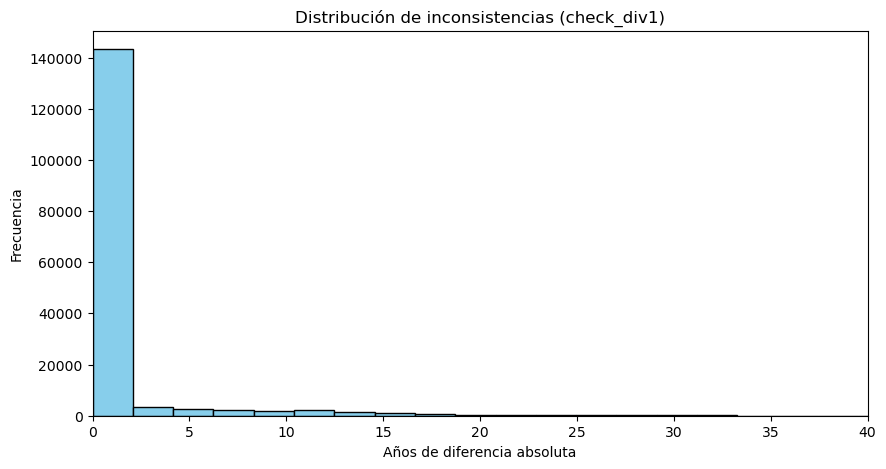

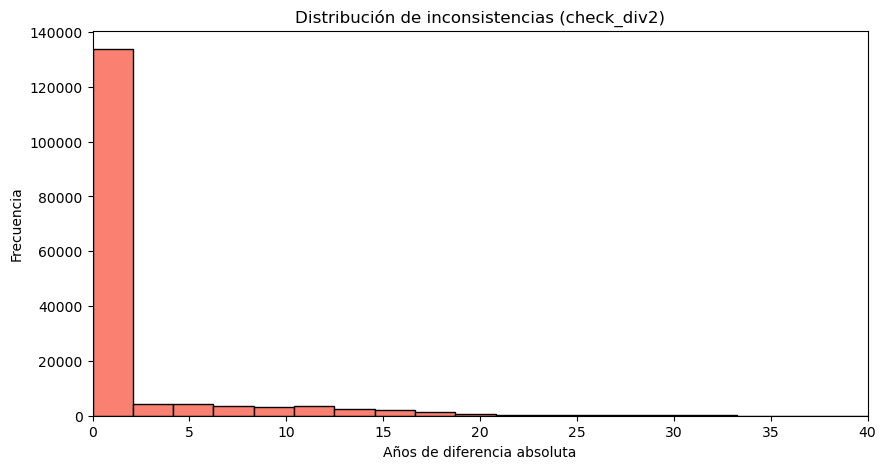

In [1313]:
import matplotlib.pyplot as plt

# --- Histograma de check_div1 ---
plt.figure(figsize=(10,5))
plt.hist(df["check_div1"].dropna(), bins=50, color="skyblue", edgecolor="black")
plt.title("Distribución de inconsistencias (check_div1)")
plt.xlabel("Años de diferencia absoluta")
plt.ylabel("Frecuencia")
plt.xlim(0, 40)  # puedes ampliar si hay valores mucho más grandes
plt.show()

# --- Histograma de check_div2 ---
plt.figure(figsize=(10,5))
plt.hist(df["check_div2"].dropna(), bins=50, color="salmon", edgecolor="black")
plt.title("Distribución de inconsistencias (check_div2)")
plt.xlabel("Años de diferencia absoluta")
plt.ylabel("Frecuencia")
plt.xlim(0, 40)
plt.show()


Con esta evidencia, se definió un umbral práctico (p. ej., **> 5 años**) para marcar **inconsistencias severas** en `edad_mdiv1/2`, que posteriormente se imputaron.

### **2.2.6 KNN “acelerado” para reimputar incoherencias en `mdiv1/2`**

Para las filas con incoherencias severas, se:

1. **Marcaron como `NaN`** las edades al matrimonio inconsistentes.
2. Se imputaron con **KNNImputer** usando **solo un subconjunto numérico relevante**  
   (`edad_div1`, `edad_div2`, `edad_mdiv1`, `edad_mdiv2`, `dura_leg`, `dura_soc`), lo que **reduce dimensionalidad** y **acelera** el cálculo.
3. Se **redondearon** los resultados para conservar valores enteros de edad.  
4. Se implementó **caché (`mdiv_imputadas.parquet`)** para **evitar recalcular** KNN en ejecuciones posteriores del notebook.

In [1314]:
CACHE_PATH = "mdiv_imputadas.parquet"

if os.path.exists(CACHE_PATH):
    sub_imputed = pd.read_parquet(CACHE_PATH)
    df[sub_imputed.columns] = sub_imputed.to_numpy()

else:
    df.loc[df["check_div1"] > 5, "edad_mdiv1"] = np.nan
    df.loc[df["check_div2"] > 5, "edad_mdiv2"] = np.nan

    print("Marcados como NaN:")
    print(" - edad_mdiv1 inconsistentes:", df["edad_mdiv1"].isna().sum())
    print(" - edad_mdiv2 inconsistentes:", df["edad_mdiv2"].isna().sum())

    subset_cols = ["edad_div1", "edad_div2", "edad_mdiv1", "edad_mdiv2", "dura_leg", "dura_soc"]
    sub = df[subset_cols].copy()

    imputer = KNNImputer(n_neighbors=5, weights="uniform")
    sub_imputed = pd.DataFrame(
        imputer.fit_transform(sub),
        columns=subset_cols, index=df.index
    )

    df[subset_cols] = sub_imputed

    df["edad_mdiv1"] = df["edad_mdiv1"].round().astype("Int64")
    df["edad_mdiv2"] = df["edad_mdiv2"].round().astype("Int64")

    sub_imputed.to_parquet(CACHE_PATH, index=False)


> **Por qué KNN aquí:** nos interesa que las edades al matrimonio “se parezcan” a casos reales **vecinos** (similar `edad_div`, `dura_leg`, etc.). Este enfoque respeta la estructura conjunta de las variables temporales.

### **2.2.7 Re-evaluación de outliers tras la corrección**

Se volvió a ejecutar el detector de Tukey (k=3).  


In [1315]:
outliers_report = detectar_outliers(df, vars_cuantitativas, k=3)
display(outliers_report)

,Variable,Outliers,%_Outliers,Ejemplos
0,edad_div1,5,0.00,"[97.0, 95.0]"
1,edad_div2,11,0.01,"[91.0, 93.0, 97.0, 92.0, 99.0, 94.0]"
2,edad_mdiv1,1738,1.06,"[57.0, 62.0, 67.0, 59.0, 69.0, 60.0, 75.0, 66.0, 58.0, 64.0]"
3,edad_mdiv2,866,0.53,"[61.0, 59.0, 57.0, 69.0, 60.0, 64.0, 58.0, 68.0, 65.0, 63.0]"
4,hijos,843,0.52,"[7, 6, 11, 10, 9, 8, 13, 15, 12, 16]"
5,hij_men,150,0.09,"[5, 8, 6, 7]"
6,pen_hij,150,0.09,"[5, 8, 6, 7]"
7,pat_hij,150,0.09,"[5, 8, 6, 7]"
8,cus_hij,150,0.09,"[5, 8, 6, 7]"
9,dura_leg,2738,1.67,"[98.0, 97.0, 96.0, 95.0, 94.0, 93.0]"


Los outliers en `edad_mdiv1/2` **bajaron drásticamente** (≈1.06% y 0.53%), y el conjunto total de atípicos pasó a ser **muy pequeño** en proporción al tamaño muestral.

> **Decisión final:** dado el **bajo porcentaje residual de outliers** y su **potencial impacto negativo** en el ajuste de modelos, **se eliminaron** esas filas atípicas.  

In [1316]:
def obtener_outlier_idx(df, vars_cuantitativas, k=3):
    out_idx = set()
    for col in [c for c in vars_cuantitativas if c in df.columns]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        li = q1 - (k * iqr)
        ls = q3 + (k * iqr)
        idx = df[(df[col] < li) | (df[col] > ls)].index
        out_idx.update(idx)
    return list(out_idx)

outlier_idx = obtener_outlier_idx(df, vars_cuantitativas)
df_clean = df.drop(index=outlier_idx)
df = df_clean

In [1317]:
cols_drop = ["check_div1", "consistente_div1", "check_div2", "consistente_div2"]
df = df.drop(columns=[c for c in cols_drop if c in df.columns])
df.head(10)

,tipo_div,ent_regis,mun_regis,loc_regis,tloc_regis,ent_mat,mun_mat,local_mat,tloc_mat,dia_mat,mes_mat,anio_mat,dia_reg,mes_reg,anio_reg,dia_sen,mes_sen,anio_sen,dia_eje,mes_eje,anio_eje,ini_juic,favor,causa,hijos,hij_men,custodia,cus_hij,pat_pot,pat_hij,pension,pen_hij,naci_div1,edad_div1,eciv_adiv1,ent_rhdiv1,mun_rhdiv1,tloc_div1,con_acdiv1,dedic_div1,sexo_div1,naci_div2,edad_div2,eciv_adiv2,ent_rhdiv2,mun_rhdiv2,tloc_div2,con_acdiv2,dedic_div2,sexo_div2,dura_soc,dura_leg,edad_mdiv1,edad_mdiv2,t_dvante
0,1,1,1.0,1.0,15,15,114.0,1.0,4.0,14.0,12.0,2019.0,17.0,10.0,2022.0,29,3,2023,29,3,2023,1,3,28,4,2,3.0,2,3.0,2,1.0,2,1,41.0,1.0,1,1.0,15.0,1,1.0,2,1,42.0,1.0,1,1.0,15.0,9,1.0,1,18.0,18.0,24.0,24.0,1
1,1,1,1.0,1.0,15,1,1.0,1.0,15.0,14.0,12.0,2019.0,29.0,1.0,2023.0,28,3,2023,29,3,2023,1,3,28,2,2,3.0,2,3.0,2,1.0,2,1,30.0,1.0,1,1.0,15.0,2,3.0,2,1,29.0,1.0,1,1.0,15.0,1,1.0,1,18.0,18.0,13.0,12.8,1
2,1,1,1.0,1.0,15,1,1.0,1.0,15.0,8.0,5.0,1967.0,19.0,7.0,2022.0,19,9,2023,19,9,2023,1,3,28,0,0,0.0,0,0.0,0,4.0,0,1,68.0,1.0,1,1.0,15.0,1,1.0,1,1,42.0,1.0,1,1.0,15.0,9,1.0,2,55.0,56.0,16.0,13.4,1
5,1,1,7.0,1.0,9,1,9.0,1.0,5.0,15.0,1.0,1969.0,8.0,11.0,2022.0,15,2,2023,15,2,2023,1,3,28,5,0,0.0,0,0.0,0,2.0,0,1,70.0,1.0,1,9.0,5.0,2,2.0,2,1,73.0,1.0,1,9.0,5.0,1,1.0,1,53.0,54.0,17.0,20.0,1
6,1,1,1.0,1.0,15,9,999.0,1.0,15.0,19.0,4.0,1969.0,14.0,8.0,2023.0,26,10,2023,26,10,2023,1,3,28,4,0,0.0,0,0.0,0,4.0,0,1,75.0,1.0,24,28.0,15.0,1,1.0,1,1,72.0,1.0,1,1.0,15.0,2,2.0,2,54.0,54.0,21.0,18.0,1
8,1,1,1.0,1.0,15,1,5.0,1.0,11.0,18.0,5.0,1971.0,23.0,8.0,2023.0,30,10,2023,30,10,2023,1,3,28,2,0,0.0,0,0.0,0,4.0,0,1,70.0,1.0,1,1.0,15.0,2,2.0,2,1,42.0,1.0,1,1.0,15.0,9,1.0,1,52.0,52.0,18.0,13.2,1
9,1,1,5.0,1.0,11,9,15.0,1.0,15.0,30.0,1.0,1972.0,28.0,9.0,2023.0,25,10,2023,25,10,2023,3,3,28,2,0,0.0,0,0.0,0,4.0,0,1,75.0,1.0,1,5.0,11.0,1,1.0,1,1,70.0,1.0,1,5.0,11.0,2,2.0,2,51.0,51.0,24.0,19.0,1
10,1,1,1.0,1.0,15,1,1.0,1.0,15.0,17.0,8.0,1972.0,12.0,1.0,2023.0,13,3,2023,13,3,2023,1,3,28,1,0,0.0,0,0.0,0,4.0,0,1,72.0,1.0,1,1.0,15.0,2,4.0,1,1,42.0,1.0,1,1.0,15.0,9,1.0,2,50.0,50.0,22.0,13.4,1
12,1,1,1.0,1.0,15,1,1.0,1.0,15.0,14.0,3.0,1973.0,26.0,6.0,2023.0,24,8,2023,25,8,2023,1,3,28,0,0,0.0,0,0.0,0,4.0,0,1,65.0,1.0,1,1.0,15.0,2,2.0,2,1,42.0,1.0,1,1.0,15.0,9,1.0,1,50.0,50.0,16.0,12.8,1
14,1,1,1.0,1.0,15,1,1.0,1.0,15.0,6.0,9.0,1973.0,7.0,3.0,2023.0,23,10,2023,23,10,2023,1,3,28,3,0,0.0,0,0.0,0,4.0,0,1,71.0,1.0,1,1.0,15.0,2,4.0,1,1,70.0,1.0,1,1.0,15.0,2,2.0,2,49.0,50.0,21.0,20.0,1


In [1318]:
df.shape

(156669, 55)

> Con ello, el `DataFrame` pasó a **(156,669 filas, 55 columnas)**

### **2.2.8 Resumen de esta etapa**

- Se aplicó **Tukey** solo a **cuantitativas** (definidas manualmente).  
- Se **corrigieron codificaciones** (p. ej., 99) y se **validó coherencia temporal** entre `edad_div`, `edad_mdiv` y `dura_leg`.  
- Se usó **KNN focalizado** y **con caché** para imputar **solo donde hubo incoherencias** sustantivas.  
- El **porcentaje de outliers residual fue mínimo** y se decidió **eliminarlos**, dejando un panel **congruente y robusto** para la modelación.

## **2.3 Colinearidad e Interacciones** 

Para explorar la presencia de colinealidad entre variables numéricas, primero se generó una matriz de correlación utilizando un heatmap.  

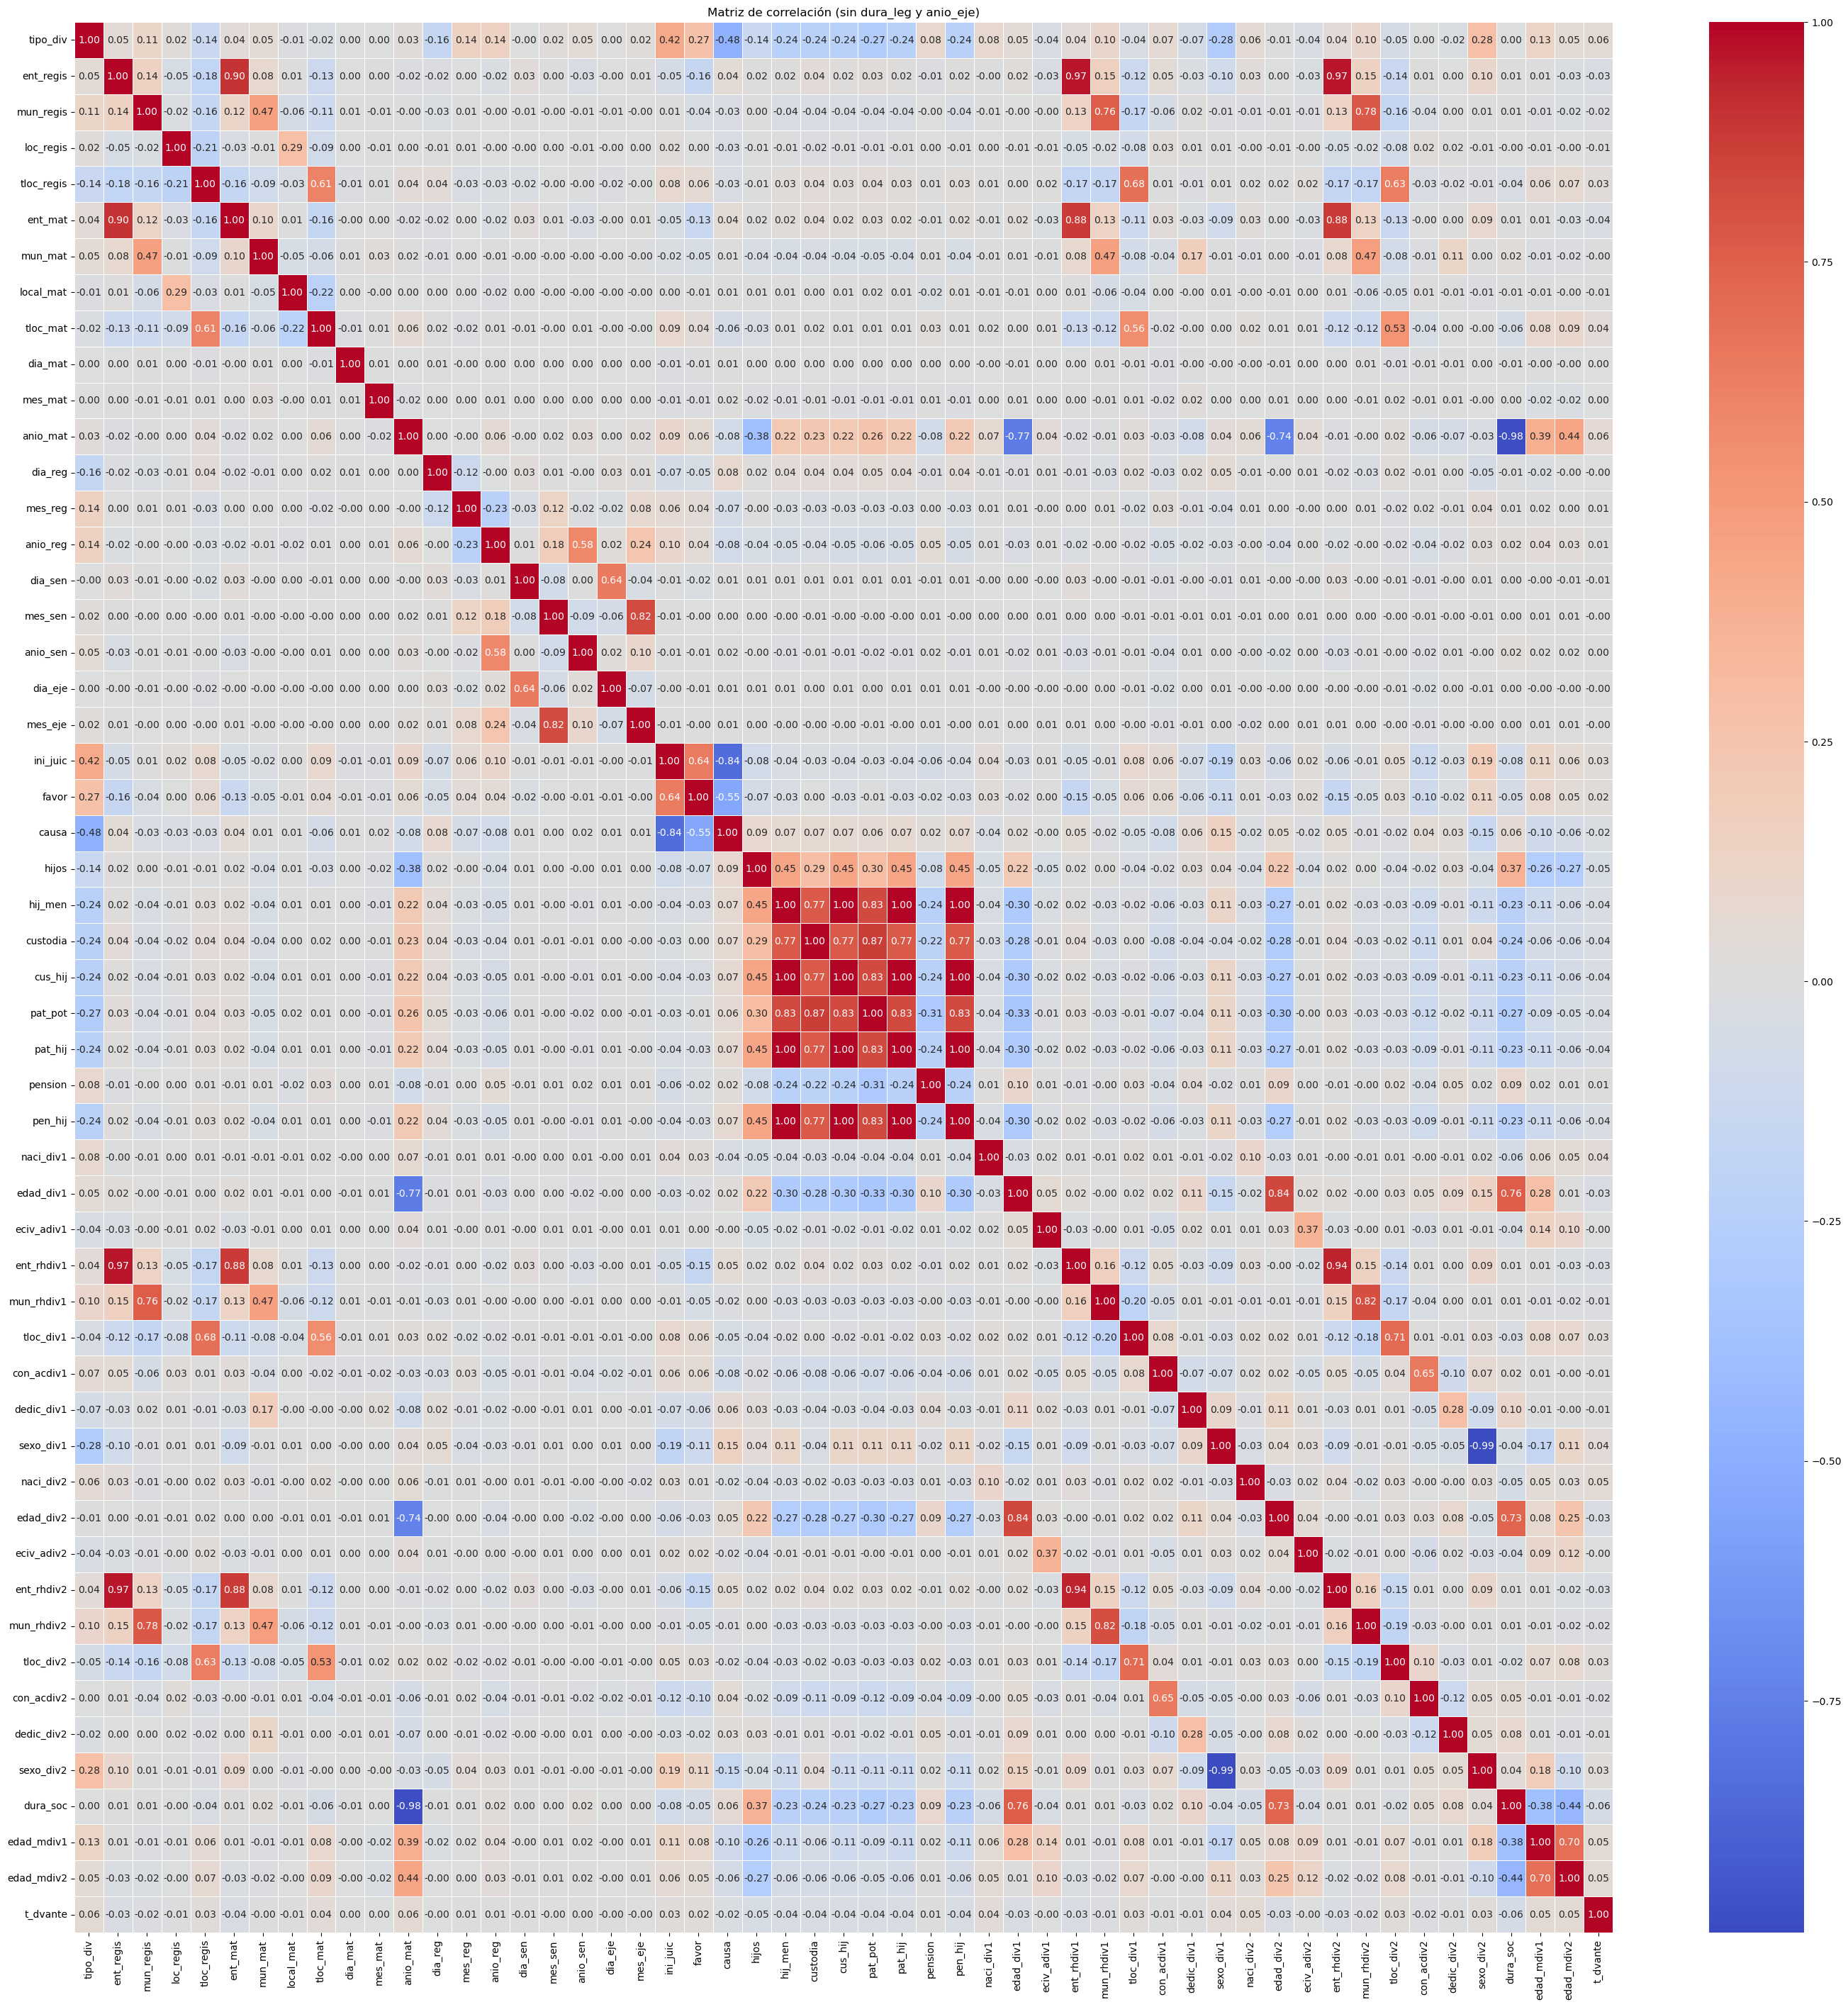

In [1319]:
import seaborn as sns
import matplotlib.pyplot as plt
y = df['dura_leg']
x = df.drop(columns=['dura_leg','anio_eje'])
corr_matrix = x.corr(numeric_only=True)
plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación (sin dura_leg y anio_eje)")
plt.show()

Aunque visualmente el mapa inicial parecía mostrar pocas correlaciones fuertes, esto no es un problema en sí mismo. En este contexto, lo que interesa no es que todas las variables tengan correlaciones altas, sino **detectar redundancias potenciales** entre variables (es decir, pares que aportan información prácticamente idéntica).  

Una baja correlación general es incluso deseable: implica que la mayoría de las variables aportan información distinta y no duplicada.

### **2.3.1 Detección sistemática de correlaciones altas**

Para identificar redundancias específicas, se calcularon todas las correlaciones entre pares de variables y se filtraron aquellas con un valor absoluto ≥ 0.7.  

Este umbral es un criterio común en estadística aplicada y aprendizaje automático para señalar **multicolinealidad fuerte**, que puede afectar la interpretabilidad de los modelos y la estabilidad de los coeficientes.

In [1320]:
# Calcular correlación solo en numéricas
corr_matrix = df.corr(numeric_only=True)

# Guardar correlaciones altas
umbral = 0.7
correlaciones_altas = []

for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            corr_val = corr_matrix.loc[col1, col2]
            if abs(corr_val) >= umbral:
                correlaciones_altas.append((col1, col2, corr_val))

# Pasar a DataFrame y eliminar duplicados
corr_altas_df = pd.DataFrame(correlaciones_altas, columns=["Var1", "Var2", "Correlación"])
corr_altas_df = corr_altas_df.drop_duplicates(subset=["Correlación"]) \
                             .sort_values(by="Correlación", ascending=False) \
                             .reset_index(drop=True)

pd.set_option("display.max_rows", None)
display(corr_altas_df)


,Var1,Var2,Correlación
0,hij_men,cus_hij,1.000000
1,dura_soc,dura_leg,0.987233
2,ent_regis,ent_rhdiv2,0.966530
3,ent_regis,ent_rhdiv1,0.966361
4,ent_rhdiv1,ent_rhdiv2,0.944381
5,ent_regis,ent_mat,0.901062
6,ent_mat,ent_rhdiv2,0.883217
7,ent_mat,ent_rhdiv1,0.878365
8,custodia,pat_pot,0.871976
9,edad_div1,edad_div2,0.837382


El procedimiento generó pares como:


- **hij_men ~ cus_hij (1.00)**: ambas variables son prácticamente la misma medición (número de hijos menores vs. hijos en custodia).  
- **custodia ~ pat_pot (0.87)**: dos variables institucionalmente distintas, pero que capturan casi la misma decisión legal.  
- **ent_mat, ent_regis, ent_rhdiv1/2 (~0.90–0.96)**: las entidades de registro y residencia se solapan, ya que los divorcios suelen registrarse en la misma entidad de residencia.  
- **edad_div1 ~ edad_div2 (0.83)**: refleja que la edad de ambos cónyuges suele estar correlacionada.  
- **dura_soc ~ dura_leg (0.98)**: ambas miden la duración del matrimonio, pero la versión legal (dura_leg) es la más estandarizada.  
- **sexo_div1 ~ sexo_div2 (-0.99)**: redundancia obvia al comparar sexo de ambos cónyuges.  
- **anio_mat ~ dura_leg (-0.99)**: artefacto temporal, ya que todas las observaciones pertenecen al mismo periodo (2023).

### **2.3.2 Generación de interacciones**


En lugar de conservar variables redundantes, se crearon **nuevas variables derivadas** que capturan de manera más compacta la información.  

Ejemplos:

- **misma_entidad, mismo_municipio, misma_tloc**: indicadores booleanos que expresan si ambos cónyuges residían en la misma entidad, municipio o tipo de localidad.  
  - Ventaja: reducen varias columnas correlacionadas a una sola variable binaria interpretativa.  

- **misma_sexo, misma_nacionalidad, misma_eciv, misma_acdiv**: permiten capturar relaciones sociales y legales sin conservar duplicados de cada cónyuge.  

- **dif_edad, dif_edad_matrimonio**: en lugar de usar las edades individuales, se modela la diferencia absoluta, más relevante para explicar fenómenos como la duración del matrimonio.  

- **div_judicial**: variable booleana que distingue entre divorcio judicial y administrativo, transformando una codificación numérica en una forma interpretable por modelos.


In [1321]:
# a) Misma entidad
if {"ent_rhdiv1","ent_rhdiv2"}.issubset(df.columns):
    df["misma_entidad"] = np.where(
        df["ent_rhdiv1"].notna() & df["ent_rhdiv2"].notna(),
        (df["ent_rhdiv1"] == df["ent_rhdiv2"]).astype(int),
        np.nan
    )
df["misma_entidad"] = df["misma_entidad"].astype("bool")

# b) Mismo municipio
if {"mun_rhdiv1","mun_rhdiv2"}.issubset(df.columns):
    df["mismo_municipio"] = np.where(
        df["mun_rhdiv1"].notna() & df["mun_rhdiv2"].notna(),
        (df["mun_rhdiv1"] == df["mun_rhdiv2"]).astype(int),
        np.nan
    )
df["mismo_municipio"] = df["mismo_municipio"].astype("bool")

# c) Mismo sexo
if {"sexo_div1","sexo_div2"}.issubset(df.columns):
    df["mismo_sexo"] = np.where(
        df["sexo_div1"].notna() & df["sexo_div2"].notna(),
        (df["sexo_div1"] == df["sexo_div2"]).astype(int),
        np.nan
    )
df["mismo_sexo"] = df["mismo_sexo"].astype("bool")

# d) Misma nacionalidad
if {"naci_div1","naci_div2"}.issubset(df.columns):
    df["misma_nacionalidad"] = np.where(
        df["naci_div1"].notna() & df["naci_div2"].notna(),
        (df["naci_div1"] == df["naci_div2"]).astype(int),
        np.nan
    )
df["misma_nacionalidad"] = df["misma_nacionalidad"].astype("bool")

# e) Mismo tamaño de localidad
if {"tloc_div1","tloc_div2"}.issubset(df.columns):
    df["misma_tloc"] = np.where(
        df["tloc_div1"].notna() & df["tloc_div2"].notna(),
        (df["tloc_div1"] == df["tloc_div2"]).astype(int),
        np.nan
    )
df["misma_tloc"] = df["misma_tloc"].astype("bool")

# f) Mismo estado civil
if {"eciv_adiv1","eciv_adiv2"}.issubset(df.columns):
    df["misma_eciv"] = np.where(
        df["eciv_adiv1"].notna() & df["eciv_adiv2"].notna(),
        (df["eciv_adiv1"] == df["eciv_adiv2"]).astype(int),
        np.nan
    )
df["misma_eciv"] = df["misma_eciv"].astype("bool")

# g) Mismo acervo conyugal
if {"con_acdiv1","con_acdiv2"}.issubset(df.columns):
    df["misma_acdiv"] = np.where(
        df["con_acdiv1"].notna() & df["con_acdiv2"].notna(),
        (df["con_acdiv1"] == df["con_acdiv2"]).astype(int),
        np.nan
    )
df["misma_acdiv"] = df["misma_acdiv"].astype("bool")

# Diferencia de edad al momento del divorcio
if {"edad_div1","edad_div2"}.issubset(df.columns):
    df["dif_edad"] = np.where(
        df["edad_div1"].notna() & df["edad_div2"].notna(),
        (df["edad_div1"] - df["edad_div2"]).abs(),
        np.nan
    )
df["dif_edad"] = df["dif_edad"].round().astype("Int64")

# Diferencia de edad al momento del matrimonio
if {"edad_mdiv1","edad_mdiv2"}.issubset(df.columns):
    df["dif_edad_matrimonio"] = np.where(
        df["edad_mdiv1"].notna() & df["edad_mdiv2"].notna(),
        (df["edad_mdiv1"] - df["edad_mdiv2"]).abs(),
        np.nan
    )
df["dif_edad_matrimonio"] = df["dif_edad_matrimonio"].round().astype("Int64")


# Pasar tipo a dummy
if "tipo_div" in df.columns:
    df["div_judicial"] = df["tipo_div"].map({1: True, 2: False})



Tras la creación de interacciones, se eliminaron columnas originales redundantes para evitar multicolinealidad y sobreajuste:

- **Variables legales duplicadas**: `dura_soc` → se conserva solo `dura_leg`.  
- **Entidades y municipios duplicados**: `ent_mat`, `ent_rhdiv1`, `ent_rhdiv2`, `mun_rhdiv1`, `mun_rhdiv2`, etc.  
- **Características de ambos cónyuges**: sexo, nacionalidad, estado civil anterior, etc., ya representadas en las nuevas variables binarias.  
- **Fechas (día, mes, año)**: se conservaron solo las de **registro** (`anio_reg`, `mes_reg`), eliminando las de matrimonio, sentencia y ejecutoria por ser redundantes o constantes.  
- **Hijos/patria potestad**: se priorizó `cus_hij`/`custodia` y se eliminaron `pat_pot`, `hij_men`, `pat_hij`.

In [1322]:
cols_drop = [
    "pat_pot", "hij_men", "pat_hij",     # nos quedamos con cus_hij/custodia
    "ent_mat",                           # redundante con ent_regis
    "dura_soc",                          # nos quedamos con dura_leg
    "ent_rhdiv1", "ent_rhdiv2",          # capturado en misma_entidad
    "mun_rhdiv1", "mun_rhdiv2",          # capturado en mismo_municipio
    "sexo_div1","sexo_div2",             # capturado en mismo_sexo
    "anio_eje", "anio_mat", "anio_sen",  # solo dejamos anio_reg
    "mes_eje", "mes_mat", "mes_sen",     # solo dejamos mes_reg
    "dia_eje", "dia_mat", "dia_sen", "dia_reg",  # días no aportan
    "naci_div1", "naci_div2",            # capturado en misma_nacionalidad
    "t_dvante", "pen_hij",               # eliminados
    "edad_mdiv1","edad_mdiv2", 
    "eciv_adiv1","eciv_adiv2",           # capturado en misma_eciv
    "con_acdiv1","con_acdiv2",           # capturado en misma_acdiv
    "tloc_div1","tloc_div2",             # capturado en misma_tloc
    "mun_regis","loc_regis",             # redundantes con ent_regis/tloc_regis
    "mun_mat","local_mat","tloc_mat",   # redundantes con los *_regis
    "tipo_div",
]

presentes = [c for c in cols_drop if c in df.columns]
df = df.drop(columns=presentes)

print("✅ Transformaciones aplicadas")
print("Columnas eliminadas:", presentes)

✅ Transformaciones aplicadas
Columnas eliminadas: ['pat_pot', 'hij_men', 'pat_hij', 'ent_mat', 'dura_soc', 'ent_rhdiv1', 'ent_rhdiv2', 'mun_rhdiv1', 'mun_rhdiv2', 'sexo_div1', 'sexo_div2', 'anio_eje', 'anio_mat', 'anio_sen', 'mes_eje', 'mes_mat', 'mes_sen', 'dia_eje', 'dia_mat', 'dia_sen', 'dia_reg', 'naci_div1', 'naci_div2', 't_dvante', 'pen_hij', 'edad_mdiv1', 'edad_mdiv2', 'eciv_adiv1', 'eciv_adiv2', 'con_acdiv1', 'con_acdiv2', 'tloc_div1', 'tloc_div2', 'mun_regis', 'loc_regis', 'mun_mat', 'local_mat', 'tloc_mat', 'tipo_div']


### **2.3.3 Resultado final**

El nuevo conjunto de datos conserva **menos variables, pero con mayor interpretabilidad y sin redundancias fuertes**.  

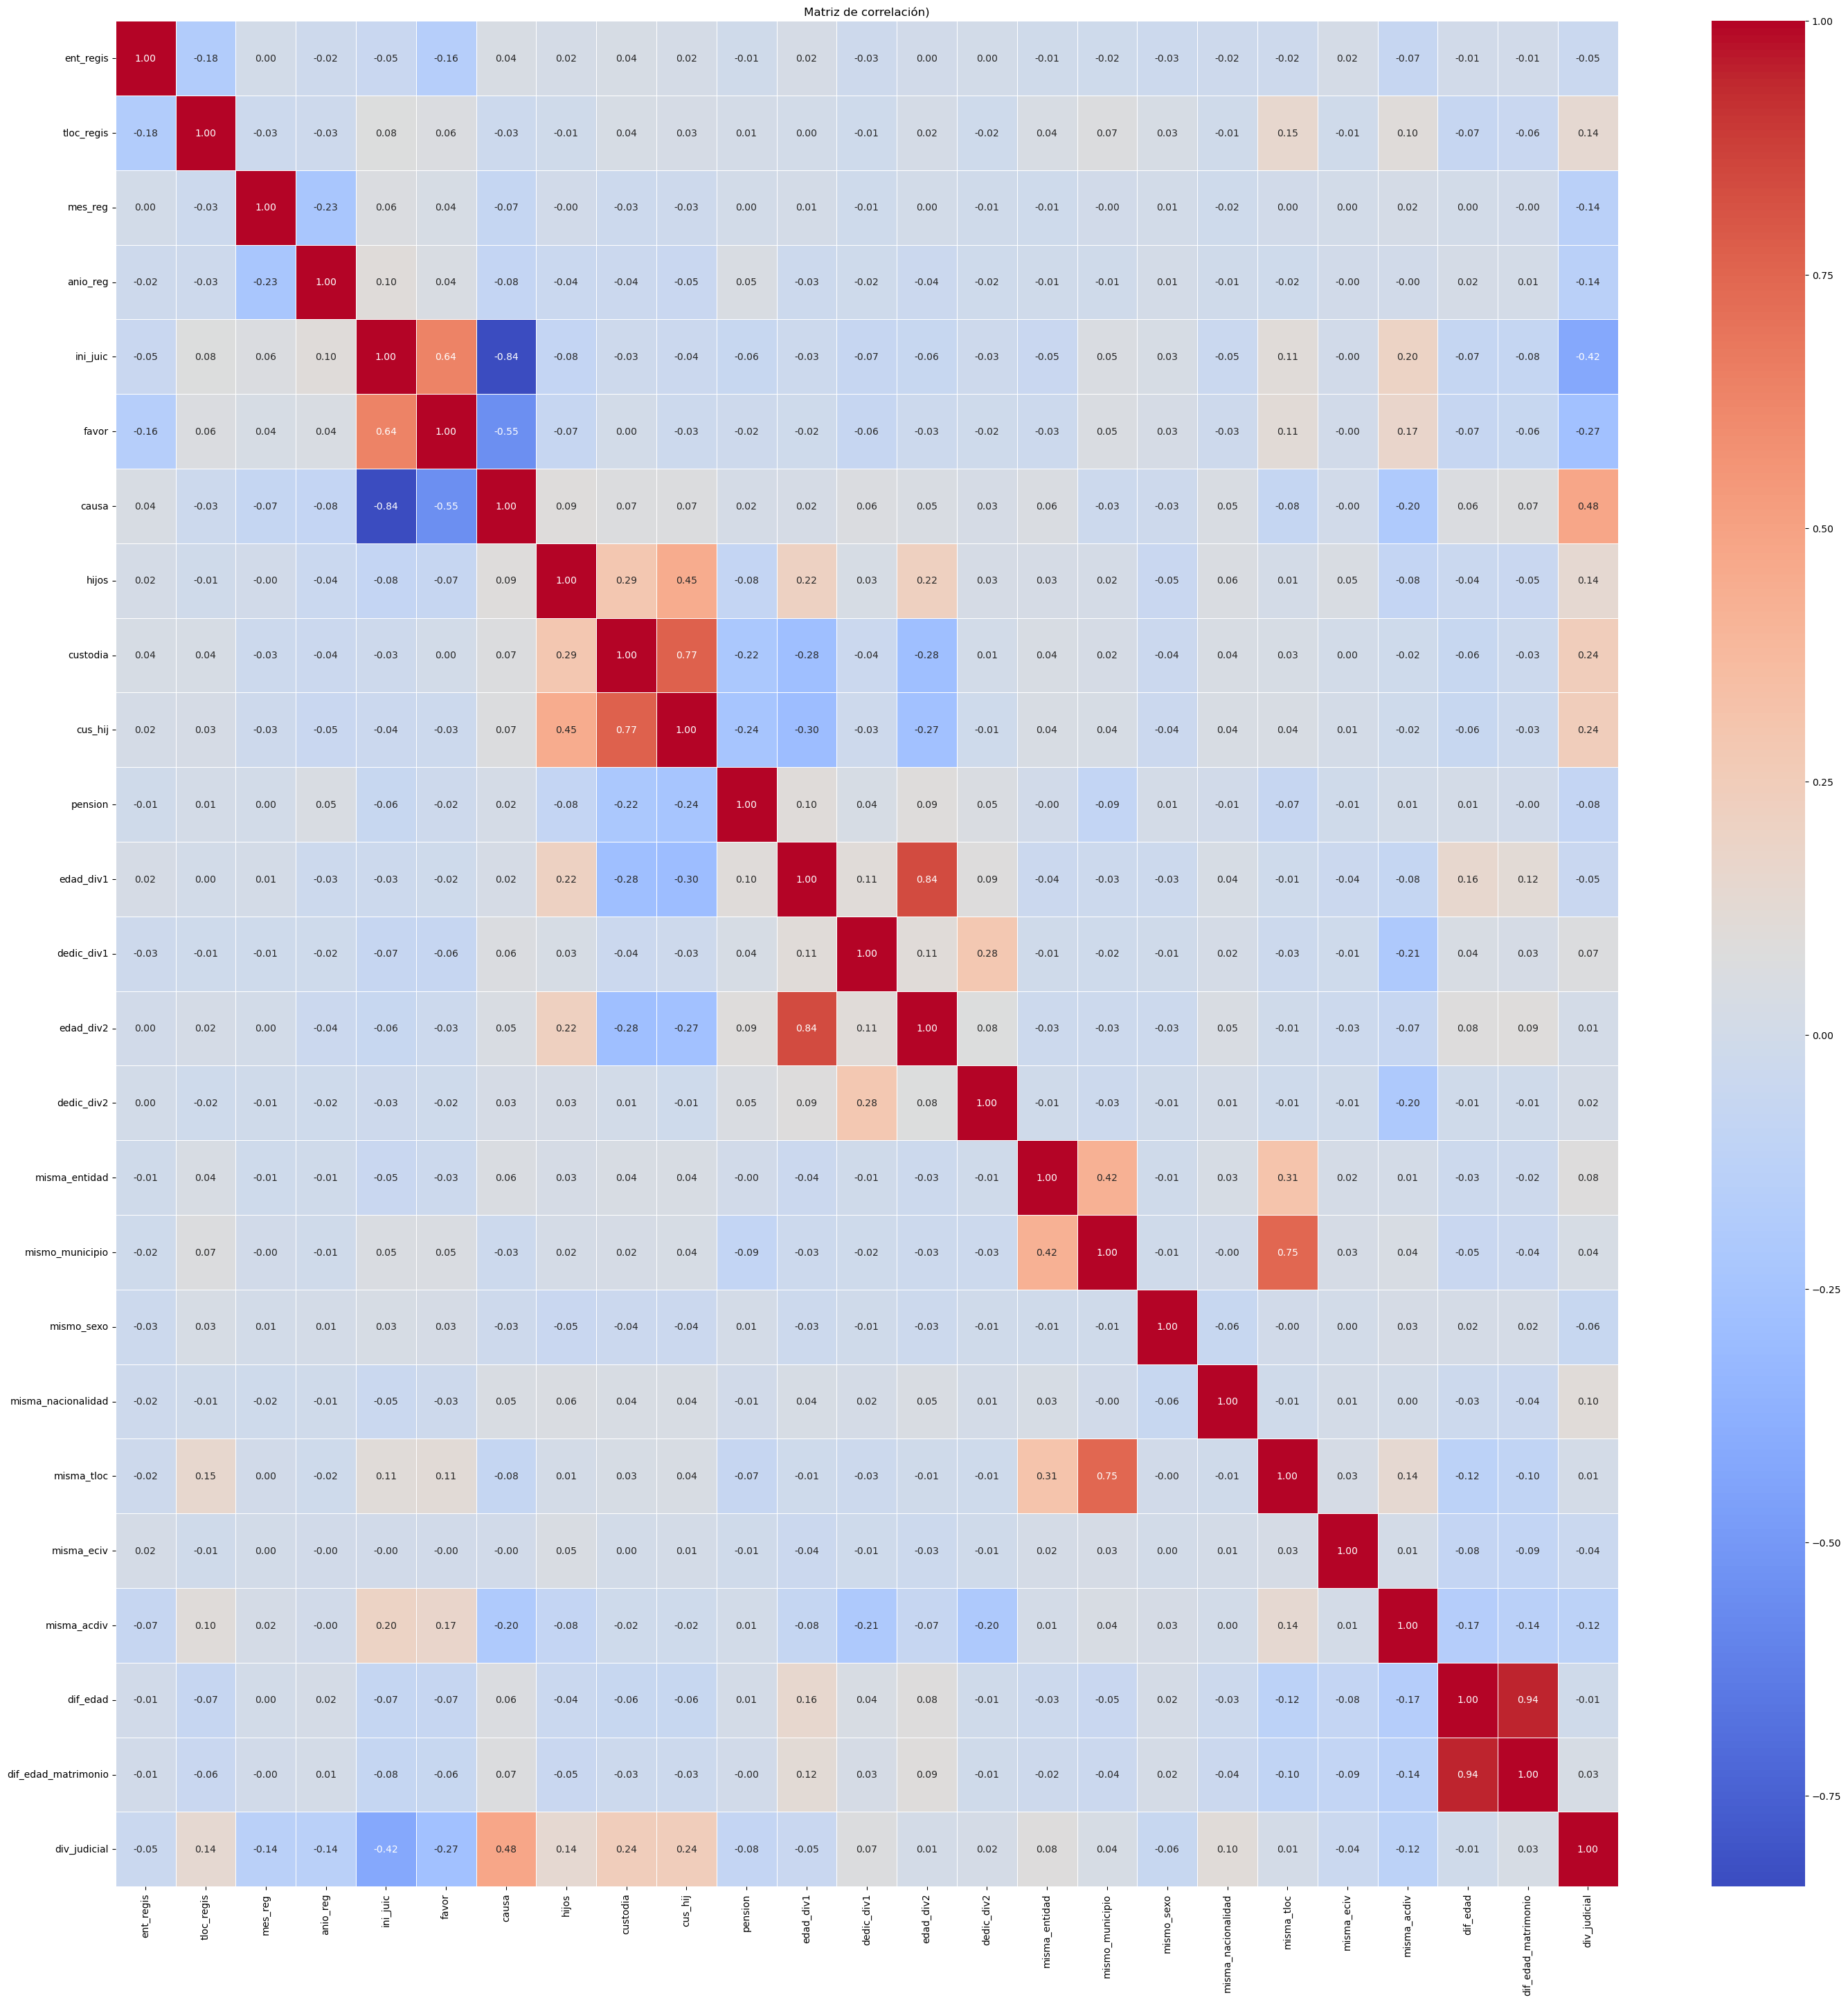

In [1323]:
import seaborn as sns
import matplotlib.pyplot as plt
y = df['dura_leg']
x = df.drop(columns=['dura_leg'])
corr_matrix = x.corr(numeric_only=True)
plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación)")
plt.show()

Esto se comprobó repitiendo la matriz de correlación: el heatmap ya no mostró agrupaciones de correlaciones extremas, lo que valida que el proceso de **ingeniería de variables + eliminación de duplicados** redujo la multicolinealidad y dejó un dataset más apto para modelado.

## **2.4 One-hot Encoding**

En el conjunto de datos aún permanecían varias variables cualitativas con múltiples categorías (por ejemplo, la entidad de registro `ent_regis`, la causa del divorcio `causa` o la dedicación laboral `dedic_div1`/`dedic_div2`).  

Para que los modelos de aprendizaje automático puedan utilizarlas correctamente, se aplicó **one-hot encoding**, que transforma cada categoría en una nueva variable binaria (0/1).  

De esta forma, en lugar de que una columna contenga códigos numéricos ambiguos (p. ej. 1 = Judicial, 2 = Administrativo, 3 = Otro), se generan varias columnas, cada una representando la pertenencia o no a esa categoría.

El procedimiento identificó las variables multicategoría y aplicó la transformación:



In [1324]:
vars_cualitativas_presentes = [c for c in vars_cualitativas if c in df.columns]
cualitativas_multicat = []
for col in vars_cualitativas_presentes:
    n_unique = df[col].nunique(dropna=True)
    if n_unique > 2:  # solo dummies para categóricas no binarias
        cualitativas_multicat.append(col)

print("Variables cualitativas multicategoría para one-hot encoding:")
print(cualitativas_multicat)

# --- 3) Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=cualitativas_multicat, drop_first=True)

print("Shape antes:", df.shape)
print("Shape después:", df_encoded.shape)

Variables cualitativas multicategoría para one-hot encoding:
['ent_regis', 'tloc_regis', 'dedic_div1', 'dedic_div2', 'causa', 'ini_juic', 'favor', 'pension', 'custodia', 'mes_reg', 'anio_reg']
Shape antes: (156669, 26)
Shape después: (156669, 155)


In [1325]:
df = df_encoded 
df.shape

(156669, 155)

> Aunque el número de variables se incrementó considerablemente (de 26 a 155), este crecimiento es necesario para que los modelos puedan interpretar adecuadamente las variables categóricas sin introducir relaciones ordinales ficticias.  


El aumento de dimensionalidad no es un problema en este punto, ya que posteriormente se aplicarán técnicas de **selección de características** que permitirán reducir el espacio de variables y quedarse solo con aquellas que aporten información relevante para la predicción.

Con esto se finaliza la **Sección 2: Corrección de inconsistencias y tratamiento de problemas en los datos**, dejando el dataset completamente limpio, sin valores faltantes, sin outliers significativos, y con variables categóricas correctamente representadas para el modelado posterior.


# **III. Metodología de selección de características**

Para reducir la dimensionalidad del dataset y quedarnos solo con las variables más informativas, se implementó un método de **selección rápida hacia adelante** (*fast forward selection*).  

Este enfoque es una variante acelerada de la selección secuencial hacia adelante, donde normalmente se evalúa el desempeño del modelo cada vez que se añade una nueva variable. Sin embargo, aquí se optimizó el procedimiento en dos etapas principales:

1. **Ranking inicial de variables**  
   Se ordenan las variables según su correlación con la variable objetivo (`dura_leg`). Alternativamente, puede emplearse la prueba F (*f_regression*), pero en este caso se usó correlación para simplicidad.  
   De esta manera, las variables más relacionadas con la duración legal del matrimonio se prueban primero.

2. **Selección greedy con validación cruzada**  
   - Se van agregando variables del ranking de forma acumulativa.  
   - En cada paso se entrena un modelo de **Regresión Lineal** y se evalúa su desempeño mediante validación cruzada (10 particiones, `KFold`).  
   - El algoritmo guarda el mejor conjunto alcanzado hasta ese momento y **detiene el proceso anticipadamente** si agregar más variables no mejora el puntaje (criterio de paciencia).  

> Este esquema es más eficiente que la selección secuencial tradicional, porque evita probar combinaciones redundantes y reduce el tiempo de cómputo al detenerse cuando ya no hay mejoras significativas.

In [1326]:
from sklearn.model_selection import train_test_split
y = df['dura_leg']
x = df.drop(columns=['dura_leg'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 23)

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

def fast_forward_all(x_train, y_train, x_test, y_test,
                     cv_splits=10, patience=2, tol=1e-6, scoring="r2",
                     k_max=None, use_f_regression=False):

    # 1) Ranking
    if use_f_regression:
        from sklearn.feature_selection import f_regression
        f, _ = f_regression(x_train, y_train)
        f = np.nan_to_num(f, nan=0.0)
        rank = x_train.columns[np.argsort(f)[::-1]].tolist()
    else:
        corrs = x_train.apply(lambda s: s.corr(y_train)).fillna(0.0)
        rank  = corrs.abs().sort_values(ascending=False).index.tolist()

    est = LinearRegression()
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)

    best_score, best_k, no_improve = -np.inf, 0, 0
    history = []

    # 2) Greedy
    limit = len(rank) if k_max is None else min(len(rank), k_max)
    for k in range(1, limit + 1):
        feats = rank[:k]
        scores = cross_val_score(est, x_train[feats], y_train,
                                 cv=cv, scoring=scoring, n_jobs=-1, error_score="raise")
        mean_score = scores.mean()
        history.append((k, feats.copy(), mean_score))

        if mean_score > best_score + tol:
            best_score, best_k, no_improve = mean_score, k, 0
        else:
            no_improve += 1
            if no_improve > patience:
                break

    best_features = history[best_k - 1][1]
    est.fit(x_train[best_features], y_train)
    r2_train = est.score(x_train[best_features], y_train)
    r2_test  = est.score(x_test[best_features],  y_test)

    return {
        "ranking_all": rank,
        "best_k": best_k,
        "best_features": best_features,
        "cv_best_score": best_score,
        "r2_train": r2_train,
        "r2_test": r2_test,
        "history": history
    }

res = fast_forward_all(x_train, y_train, x_test, y_test,
                       cv_splits=10, patience=2)

print("✅ Mejor k:", res["best_k"])
print("✅ Features seleccionadas:", res["best_features"])
print(f"R2 train: {res['r2_train']:.4f} | R2 test: {res['r2_test']:.4f}")

# Matrices ya reducidas
x_selected_train = x_train[res["best_features"]]
x_selected_test  = x_test[res["best_features"]]


c:\Users\luish\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\luish\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


✅ Mejor k: 56
✅ Features seleccionadas: ['edad_div1', 'edad_div2', 'hijos', 'pension_4.0', 'cus_hij', 'dedic_div1_4.0', 'custodia_1.0', 'custodia_2.0', 'dedic_div2_4.0', 'misma_acdiv', 'dedic_div2_2.0', 'ini_juic_3', 'misma_nacionalidad', 'causa_28', 'dedic_div1_2.0', 'mismo_sexo', 'favor_3', 'dif_edad_matrimonio', 'custodia_3.0', 'pension_12.0', 'pension_2.0', 'pension_3.0', 'anio_reg_2023.0', 'misma_eciv', 'pension_13.0', 'ent_regis_11', 'dedic_div1_3.0', 'div_judicial', 'dedic_div2_3.0', 'anio_reg_2022.0', 'tloc_regis_17', 'misma_tloc', 'ent_regis_30', 'tloc_regis_5', 'tloc_regis_4', 'ent_regis_16', 'mismo_municipio', 'ent_regis_23', 'ent_regis_12', 'misma_entidad', 'ent_regis_17', 'causa_9', 'ent_regis_8', 'tloc_regis_16', 'ent_regis_9', 'anio_reg_2019.0', 'ent_regis_29', 'anio_reg_2017.0', 'ent_regis_26', 'dedic_div1_7.0', 'tloc_regis_14', 'anio_reg_2021.0', 'tloc_regis_15', 'ent_regis_28', 'tloc_regis_7', 'ent_regis_24']
R2 train: 0.7075 | R2 test: 0.7126


El proceso identificó un conjunto óptimo de **56 variables** como las más relevantes para explicar la duración legal del matrimonio.

De hecho, el modelo alcanzó un desempeño satisfactorio:  

- **R² en entrenamiento:** 0.7075  
- **R² en prueba:** 0.7126  
- La diferencia entre `R² train` y `R² test` es mínima, lo cual indica que el modelo **generaliza bien** y no está sobreajustado.  

**Interpretación de los resultados:**

- Entre las variables más relevantes aparecen las relacionadas con la **edad de los cónyuges** (`edad_div1`, `edad_div2`, `dif_edad_matrimonio`), los **hijos** (`hijos`, `cus_hij`), así como condiciones específicas sobre la **custodia** y la **pensión alimenticia**.  
- También se destacan variables de contexto institucional y territorial (`ent_regis_*`, `tloc_regis_*`), lo que muestra que el lugar y tipo de registro tienen influencia en la duración de los matrimonios.  
- Las variables binarias generadas previamente, como `mismo_sexo`, `misma_eciv` y `misma_entidad`, también aportan valor al modelo.  


> En conjunto, la selección rápida permitió identificar un subconjunto robusto de predictores que explican alrededor del **71% de la variabilidad** en la duración legal de los matrimonios, un resultado sólido tratándose de un fenómeno social complejo.

Con esto, dejamos preparado el dataset reducido (`x_selected_train`, `x_selected_test`) para la siguiente etapa de modelado predictivo.

# **IV. Construcción y validación de modelos lineales y no lineales de predicción**

## **4.1 Modelo de Regresión Lineal**

La regresión lineal se emplea como primer modelo base para explicar la variable objetivo `dura_leg`.  

El modelo busca establecer una relación **lineal** de la forma:

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$

donde los coeficientes $\beta_i$ se ajustan minimizando el error cuadrático medio (MSE).

C:\Users\luish\AppData\Local\Temp\ipykernel_41740\317563608.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


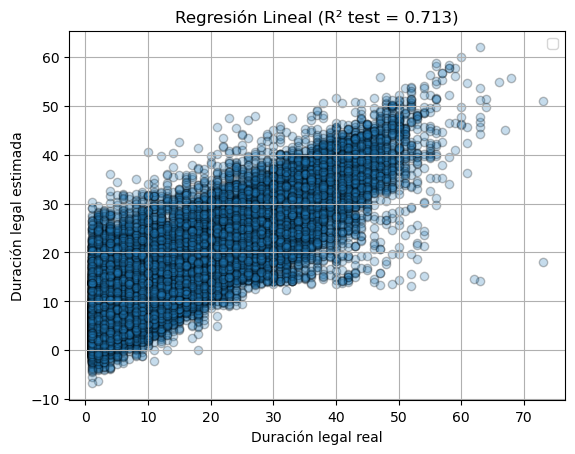

In [1327]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# --- Entrenar el modelo lineal con las features seleccionadas ---
model = LinearRegression()
model.fit(x_selected_train, y_train)

# --- Predicciones en test ---
y_pred = model.predict(x_selected_test)

# --- R² en test ---
r2_linear = r2_score(y_test, y_pred)

# --- Gráfica real vs estimado ---
plt.scatter(y_test, y_pred, alpha=0.25, edgecolor="k")
plt.xlabel("Duración legal real")
plt.ylabel("Duración legal estimada")
plt.title(f"Regresión Lineal (R² test = {r2_linear:.3f})")
plt.legend()
plt.grid(True)
plt.show()


En el conjunto de prueba (`test`) se obtuvo:

$R^2 \approx 0.713$

El modelo logra explicar alrededor del **71% de la variabilidad** de la duración legal del matrimonio.  

La gráfica de dispersión real vs estimado muestra que los puntos siguen una tendencia diagonal, aunque existe dispersión en valores altos de duración, indicando **pérdida de ajuste en los extremos**.

## **4.2 Modelo de Regresión Polinomial**

Para capturar posibles **relaciones no lineales**, se generaron términos polinomiales de grado 2 (cuadrados e interacciones de las variables).  

El modelo ahora se ajusta como:

$\hat{y} = \beta_0 + \sum_i \beta_i x_i + \sum_i \beta_{ii} x_i^2 + \sum_{i<j} \beta_{ij} x_i x_j$


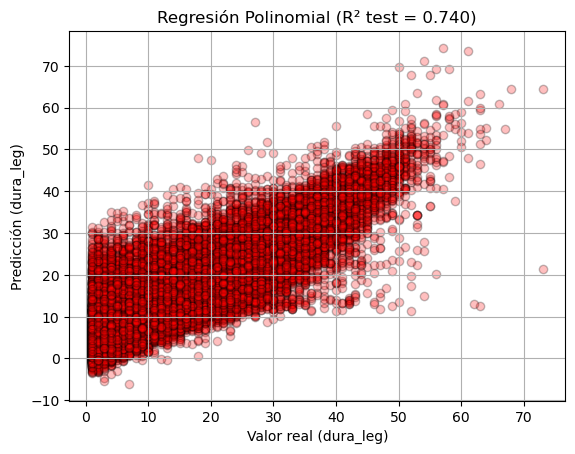

In [1328]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# --- Transformación polinomial de grado 2 ---
poly = PolynomialFeatures(degree=2, include_bias=False)

x_poly_train = poly.fit_transform(x_selected_train)
x_poly_test  = poly.transform(x_selected_test)

# --- Entrenamiento ---
model = LinearRegression()
model.fit(x_poly_train, y_train)

# --- Predicciones ---
yhat_poly = model.predict(x_poly_test)

# --- Métrica R² ---
r2_poly = r2_score(y_test, yhat_poly)

# --- Gráfico ---
plt.scatter(y_test, yhat_poly, color="red", alpha=0.25, edgecolor="k")
plt.title(f"Regresión Polinomial (R² test = {r2_poly:.3f})")
plt.xlabel("Valor real (dura_leg)")
plt.ylabel("Predicción (dura_leg)")
plt.grid(True)
plt.show()


En el conjunto de prueba se obtuvo:

$R^2 \approx 0.740$

Esto representa un **incremento de 2.7 puntos porcentuales respecto al modelo lineal**.  

En la gráfica, la nube de puntos se ajusta mejor a la diagonal, especialmente en valores altos de `dura_leg`.


# **V. Evaluación del ajuste y métricas de desempeño de los modelos**

Se compararon ambos modelos con dos métricas principales:

- **MSE (Mean Squared Error):** mide la magnitud del error de predicción.  
- **R²:** mide la proporción de la varianza explicada por el modelo. 

In [1329]:
from sklearn.metrics import mean_squared_error

mse_poly = mean_squared_error(y_test,yhat_poly)
mse_linear = mean_squared_error(y_test,y_pred)
print("MSE de Regresión Lineal:",mse_linear)
print("R^2 de Regresión Lineal:",r2_linear)
print("MSE de Regresión Polinomial:",mse_poly)
print("R^2 de Regresión Polinomial:",r2_poly)

MSE de Regresión Lineal: 37.174536236055985
R^2 de Regresión Lineal: 0.7126004993082042
MSE de Regresión Polinomial: 33.64290063838822
R^2 de Regresión Polinomial: 0.7399038744182516


| Modelo              | MSE    | R²    |
|---------------------|--------|-------|
| Regresión Lineal    | 37.17  | 0.713 |
| Regresión Polinomial| 33.64  | 0.740 |

- El modelo polinomial **reduce el error (MSE)** y **aumenta el R²**, confirmando que la relación entre variables predictoras y la duración legal no es estrictamente lineal.  
- La mejora es modesta, pero suficiente para mostrar que las **interacciones y términos cuadráticos capturan patrones más complejos**.  
- Existe riesgo de **sobreajuste** si se aumenta el grado polinomial.  
- La dispersión aún visible en ambos modelos indica que factores no observados (variables omitidas o ruido en los datos) también influyen en la duración del matrimonio.  

# **VI. Aplicación del modelo óptimo para inferencia estadística**

En esta etapa se seleccionó el modelo **polinomial de segundo grado** como el óptimo, ya que ofreció un mejor desempeño predictivo (R² ≈ 0.74) frente al modelo lineal.  

El objetivo ahora no es solo predecir, sino **realizar inferencias estadísticas** sobre las variables que explican la duración legal del matrimonio (`dura_leg`).


## **6.1 Buenas prácticas adoptadas**

> Para este análisis se tomaron en cuenta únicamente **variables numéricas continuas o discretas**, excluyendo las booleanas y categóricas codificadas en dummies.  

Las razones principales son:
- Los coeficientes en un modelo de regresión polinomial se interpretan con mayor claridad cuando las variables son **continuas**.  
- Incluir variables binarias (ej. `misma_entidad`) podría complicar la interpretación al mezclarse con interacciones polinómicas irrelevantes.  
- Trabajar con variables numéricas permite aprovechar **estandarización y escalado** para evitar que diferencias de magnitud distorsionen los coeficientes.  

Esto aumenta la **robustez de las inferencias** y facilita generalizar resultados.


In [1330]:
x_selected_train.dtypes[df.dtypes != 'bool']

edad_div1              float64
edad_div2              float64
hijos                    Int64
cus_hij                  Int64
dif_edad_matrimonio      Int64
dtype: object

Las variables seleccionadas fueron:

- `edad_div1`: edad del primer cónyuge al divorcio.  
- `edad_div2`: edad del segundo cónyuge al divorcio.  
- `hijos`: número de hijos en común.  
- `cus_hij`: número de hijos bajo custodia.  
- `dif_edad_matrimonio`: diferencia de edad entre los cónyuges al casarse.  

## **6.2 Modelo OLS polinomial**

Se aplicó una transformación polinómica de segundo grado sobre las variables seleccionadas, generando términos cuadráticos e interacciones.  

Posteriormente se estimó un modelo de regresión con `statsmodels.OLS`.

El modelo general toma la forma:

$$
\hat{y} = \beta_0 + \sum_i \beta_i x_i + \sum_i \beta_{ii} x_i^2 + \sum_{i<j} \beta_{ij} x_i x_j
$$

donde:
- $x_i$ son las variables numéricas seleccionadas,  
- $x_i^2$ representan efectos no lineales,  
- $x_i x_j$ representan interacciones entre factores. 

In [1331]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
continuas = ["edad_div1", "edad_div2", "hijos", "cus_hij", "dif_edad_matrimonio"]
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(x_selected_train[continuas])
poly = PolynomialFeatures(degree=2, include_bias=False)
Xc_poly = poly.fit_transform(Xc_scaled)
poly_names = poly.get_feature_names_out(continuas)
x_poly_train = pd.DataFrame(Xc_poly, index=x_selected_train.index, columns=poly_names)
x_poly_train = sm.add_constant(x_poly_train, has_constant="add")
poly_inf = sm.OLS(y_train, x_poly_train).fit()
poly_inf.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               dura_leg   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 1.363e+04
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:38:11   Log-Likelihood:            -3.5370e+05
No. Observations:              109668   AIC:                         7.074e+05
Df Residuals:                  109647   BIC:                         7.076e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            16.2157      0.035    459.345      0.000      16.146      16.285
edad_div1                         4.9159      0.054     90.232      0.000       4.809       5.023
edad_div2                         2.8444      0.052     54.623      0.000       2.742       2.946
hijos                             3.6644      0.037     98.394      0.000       3.591       3.737
cus_hij                          -1.9604      0.036    -54.266      0.000      -2.031      -1.890
dif_edad_matrimonio              -2.1822      0.031    -69.332      0.000      -2.244      -2.121
edad_div1^2                       3.4999      0.055     63.664      0.000       3.392       3.608
edad_div1 edad_div2              -6.0417      0.106    -57.052      0.000      -6.249      -5.834
edad_div1 hijos                  -0.0294      0.041     -0.717      0.473      -0.110       0.051
edad_div1 cus_hij                -0.5222      0.047    -11.170      0.000      -0.614      -0.431
edad_div1 dif_edad_matrimonio    -0.3370      0.024    -13.783      0.000      -0.385      -0.289
edad_div2^2                       2.9462      0.058     50.567      0.000       2.832       3.060
edad_div2 hijos                   0.1309      0.040      3.295      0.001       0.053       0.209
edad_div2 cus_hij                -0.4165      0.045     -9.303      0.000      -0.504      -0.329
edad_div2 dif_edad_matrimonio     0.1557      0.024      6.480      0.000       0.109       0.203
hijos^2                          -0.4803      0.020    -23.759      0.000      -0.520      -0.441
hijos cus_hij                     0.9047      0.047     19.414      0.000       0.813       0.996
hijos dif_edad_matrimonio        -0.0897      0.024     -3.703      0.000      -0.137      -0.042
cus_hij^2                        -0.4852      0.034    -14.180      0.000      -0.552      -0.418
cus_hij dif_edad_matrimonio       0.2949      0.025     11.941      0.000       0.247       0.343
dif_edad_matrimonio^2            -0.6040      0.013    -44.910      0.000      -0.630      -0.578
==============================================================================
Omnibus:                     8171.532   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30240.726
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       5.493   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **6.3 Resultados principales**


- **R² ajustado:** 0.713  
  El modelo explica aproximadamente **71.3% de la variabilidad** de la duración legal del matrimonio.  

- **F-statistic (p < 0.001):** El modelo en su conjunto es altamente significativo.  

- **N observaciones:** 109,668 casos válidos tras el preprocesamiento.  

- **Coeficientes significativos:** Prácticamente todas las variables y sus interacciones resultaron **estadísticamente significativas (p < 0.05)**, excepto `edad_div1*hijos`.  


## **6.4 Inferencias por variable**

A continuación se presentan inferencias clave basadas en los coeficientes y sus intervalos de confianza al 95%:

1. **Edad de los cónyuges al divorcio**  
   - `edad_div1`: β = 4.92 [4.81, 5.02]  
   - `edad_div2`: β = 2.84 [2.74, 2.95]  
   > Cada año adicional de edad se asocia con un **aumento de entre 2.7 y 5 años en la duración del matrimonio**, dependiendo de cuál cónyuge se considere.  
   > Esto sugiere que los divorcios ocurren en edades más tardías tras matrimonios más prolongados.

2. **Número de hijos**  
   - `hijos`: β = 3.66 [3.59, 3.74]  
   > Cada hijo adicional aumenta la duración legal esperada en **aprox. 3.6 años**.  
   > Intervalo de confianza estrecho → efecto robusto.  
   > Implica que la presencia de hijos actúa como un factor estabilizador del matrimonio.

3. **Custodia de hijos**  
   - `cus_hij`: β = -1.96 [-2.03, -1.89]  
   > Tener hijos bajo custodia reduce la duración legal estimada en **~2 años por hijo**.  
   > Señala un posible efecto de **disolución acelerada en matrimonios con custodia disputada**.

4. **Diferencia de edad al casarse**  
   - `dif_edad_matrimonio`: β = -2.18 [-2.24, -2.12]  
   > Cada año adicional de diferencia de edad al casarse se asocia con **~2.2 años menos de duración**.  
   > Relación negativa clara, consistente con estudios que muestran que grandes diferencias de edad reducen la estabilidad matrimonial.

## **6.5 Efectos no lineales**

- `edad_div1^2`: β = 3.50 [3.39, 3.61]  
- `edad_div2^2`: β = 2.95 [2.83, 3.06]  

> Existe **curvatura positiva**: a edades mayores, el efecto sobre la duración **se intensifica**.  
> Ejemplo: la diferencia entre casarse a los 20 vs 30 años no impacta tanto como la diferencia entre 40 vs 50.

- `hijos^2`: β = -0.48 [-0.52, -0.44]  
- `cus_hij^2`: β = -0.49 [-0.55, -0.42]  

> Se observan **rendimientos decrecientes**: aunque tener más hijos inicialmente alarga la duración, el efecto se atenúa e incluso se revierte en familias muy numerosas o con muchos hijos en custodia.

- `dif_edad_matrimonio^2`: β = -0.60 [-0.63, -0.58]  
> Refuerza el impacto negativo de las grandes diferencias de edad: matrimonios con **brechas muy amplias se disuelven más rápido**.

## **6.6 Interacciones relevantes**

- `edad_div1 * edad_div2`: β = -6.04 [-6.25, -5.83]  
  > Interacción negativa: si ambos cónyuges tienen edades altas, la duración tiende a ser menor a lo esperado.  

- `hijos * cus_hij`: β = 0.90 [0.81, 1.00]  
  > El efecto negativo de la custodia se modera cuando hay más hijos en común: **la carga se reparte y reduce el impacto**.  

- `cus_hij * dif_edad_matrimonio`: β = 0.29 [0.25, 0.34]  
  > Contrarresta parcialmente el efecto negativo de la diferencia de edad cuando hay hijos en custodia.  

## **6.7 Conclusiones inferenciales**


- El modelo confirma que la **edad al divorcio y el número de hijos** son los predictores más robustos de la duración matrimonial.  
- La **custodia de hijos** y la **diferencia de edad al casarse** son factores que reducen significativamente la duración.  
- Los **efectos cuadráticos y de interacción** muestran que las relaciones sociales son complejas:  
  - Los hijos alargan la duración, pero en exceso su efecto se revierte.  
  - Las diferencias de edad pequeñas son tolerables, pero diferencias grandes reducen drásticamente la duración.  
- El margen de error de los coeficientes es bajo, lo que aporta **alta confianza estadística** en las inferencias.  

> El modelo polinomial no solo es el más preciso en términos predictivos, sino también el que permite **interpretar relaciones no lineales** entre factores sociodemográficos y duración del matrimonio, ofreciendo evidencia sólida para estudios sociológicos y de política pública.


# **VII. Bibliografía**

Instituto Nacional de Estadística y Geografía. (2023). Estadísticas de divorcios, 2023 [Conjunto de datos]. INEGI. https://www.inegi.org.mx/app/descarga/ficha.html?tit=2340795&ag=0&f=csv

OpenAI. (2025). ChatGPT (Versión GPT-5) [Modelo de lenguaje de inteligencia artificial]. https://chat.openai.com/